### Loading Packages

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
current_working_directory = os.getcwd()
SAVEDIR = os.path.dirname(current_working_directory)

In [3]:
def calculate_rmse(true_labels, pred_labels):
    """
    计算均方根误差 (RMSE)

    参数:
        true_labels (np.array): 真实标签数组
        pred_labels (np.array): 预测标签数组

    返回:
        rmse (float): 均方根误差
    """
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)
    mse = np.mean((true_labels - pred_labels) ** 2)  # 均方误差
    rmse = np.sqrt(mse)  # 均方根误差
    return rmse

In [4]:
def exact_accuracy(true_labels, pred_labels):
    """
    计算 Adjacency Accuracy

    参数:
        true_labels (list): 真实标签列表（0 到 5）
        pred_labels (list): 预测标签列表（0 到 5）

    返回:
        accuracy (float): Adjacency Accuracy
    """
    success_count = 0
    for true, pred in zip(true_labels, pred_labels):
        if true == pred:
            success_count += 1
    accuracy = success_count / len(true_labels)
    return accuracy

In [5]:
def adjacency_accuracy(true_labels, pred_labels):
    """
    计算 Adjacency Accuracy

    参数:
        true_labels (list): 真实标签列表（0 到 5）
        pred_labels (list): 预测标签列表（0 到 5）

    返回:
        accuracy (float): Adjacency Accuracy
    """
    success_count = 0
    for true, pred in zip(true_labels, pred_labels):
        if abs(true - pred) <= 1:
            success_count += 1
    accuracy = success_count / len(true_labels)
    return accuracy

###  CEFR-SP, Expert

In [6]:
df_expert = pd.read_csv("LLMGeneration/CEFR-SP/en_few-shot_25.csv")
label_all = [1 for _ in range(len(df_expert))] + [2 for _ in range(len(df_expert))] + [3 for _ in range(len(df_expert))] 
pred_all = df_expert["pred_1"].tolist() + df_expert["pred_2"].tolist() + df_expert["pred_3"].tolist()
print("RMSE: ", calculate_rmse(label_all, pred_all))
print("AdjAcc: ", round(adjacency_accuracy(label_all, pred_all)*100, 2))
print("ExAcc: ", round(exact_accuracy(label_all, pred_all)*100, 2))
correlation, p_value = spearmanr(label_all, pred_all)
print("Cor: ", correlation)

RMSE:  1.3458473429987114
AdjAcc:  74.65
ExAcc:  27.43
Cor:  0.3872265586779565


### CEFR-SP, Policy-Agent

In [7]:
df_agent = pd.read_csv("LLMGeneration/CEFR-SP/en_few-shot_27.csv")
label_all = [1 for _ in range(len(df_agent))] + [2 for _ in range(len(df_agent))] + [3 for _ in range(len(df_agent))] 
pred_all = df_agent["pred_1"].tolist() + df_agent["pred_2"].tolist() + df_agent["pred_3"].tolist()
print("RMSE: ", calculate_rmse(label_all, pred_all))
print("AdjAcc: ", round(adjacency_accuracy(label_all, pred_all)*100, 2))
print("ExAcc: ", round(exact_accuracy(label_all, pred_all)*100, 2))
correlation, p_value = spearmanr(label_all, pred_all)
print("Cor: ", correlation)

RMSE:  1.5329574153381538
AdjAcc:  64.51
ExAcc:  22.86
Cor:  0.36488341188140033


### CEFR-SP, Policy-Agent + Expert

In [5]:
df_agent_expert = pd.read_csv("LLMGeneration/CEFR-SP/en_few-shot_28.csv")
label_all = [1 for _ in range(len(df_agent_expert))] + [2 for _ in range(len(df_agent_expert))] + [3 for _ in range(len(df_agent_expert))] 
pred_all = df_agent_expert["pred_1"].tolist() + df_agent_expert["pred_2"].tolist() + df_agent_expert["pred_3"].tolist()
print("RMSE: ", calculate_rmse(label_all, pred_all))
print("AdjAcc: ", round(adjacency_accuracy(label_all, pred_all)*100, 2))
print("ExAcc: ", round(exact_accuracy(label_all, pred_all)*100, 2))
correlation, p_value = spearmanr(label_all, pred_all)
print("Cor: ", correlation)

RMSE:  1.3246809870203593
AdjAcc:  72.57
ExAcc:  29.18
Cor:  0.3827454487812223


In [6]:
cefrmap = {
    1: "A1", 2: "A2", 3: "B1", 4: "B2", 5: "C1", 6: "C2"
}
rmse_matrix = []
for source in [4, 5, 6]:
    df_ = df_agent_expert.loc[df_agent_expert["Rating"] == source]
    tmplist = []
    for target in [1, 2, 3]:
        pred_ = df_[f"pred_{target}"].tolist()
        label_ = [target for _ in range(len(pred_))]
        print(cefrmap[source], cefrmap[target], round(calculate_rmse(label_, pred_), 2))
        tmplist.append(round(calculate_rmse(label_, pred_), 2))
    rmse_matrix.append(tmplist)
print(np.array(rmse_matrix))

B2 A1 1.65
B2 A2 0.98
B2 B1 0.56
C1 A1 1.86
C1 A2 1.24
C1 B1 0.75
C2 A1 1.94
C2 A2 1.45
C2 B1 1.09
[[1.65 0.98 0.56]
 [1.86 1.24 0.75]
 [1.94 1.45 1.09]]


### Visual CEFR-SP RMSE Heatmap between Barayan et al., COLING2025. with ours agent+expert

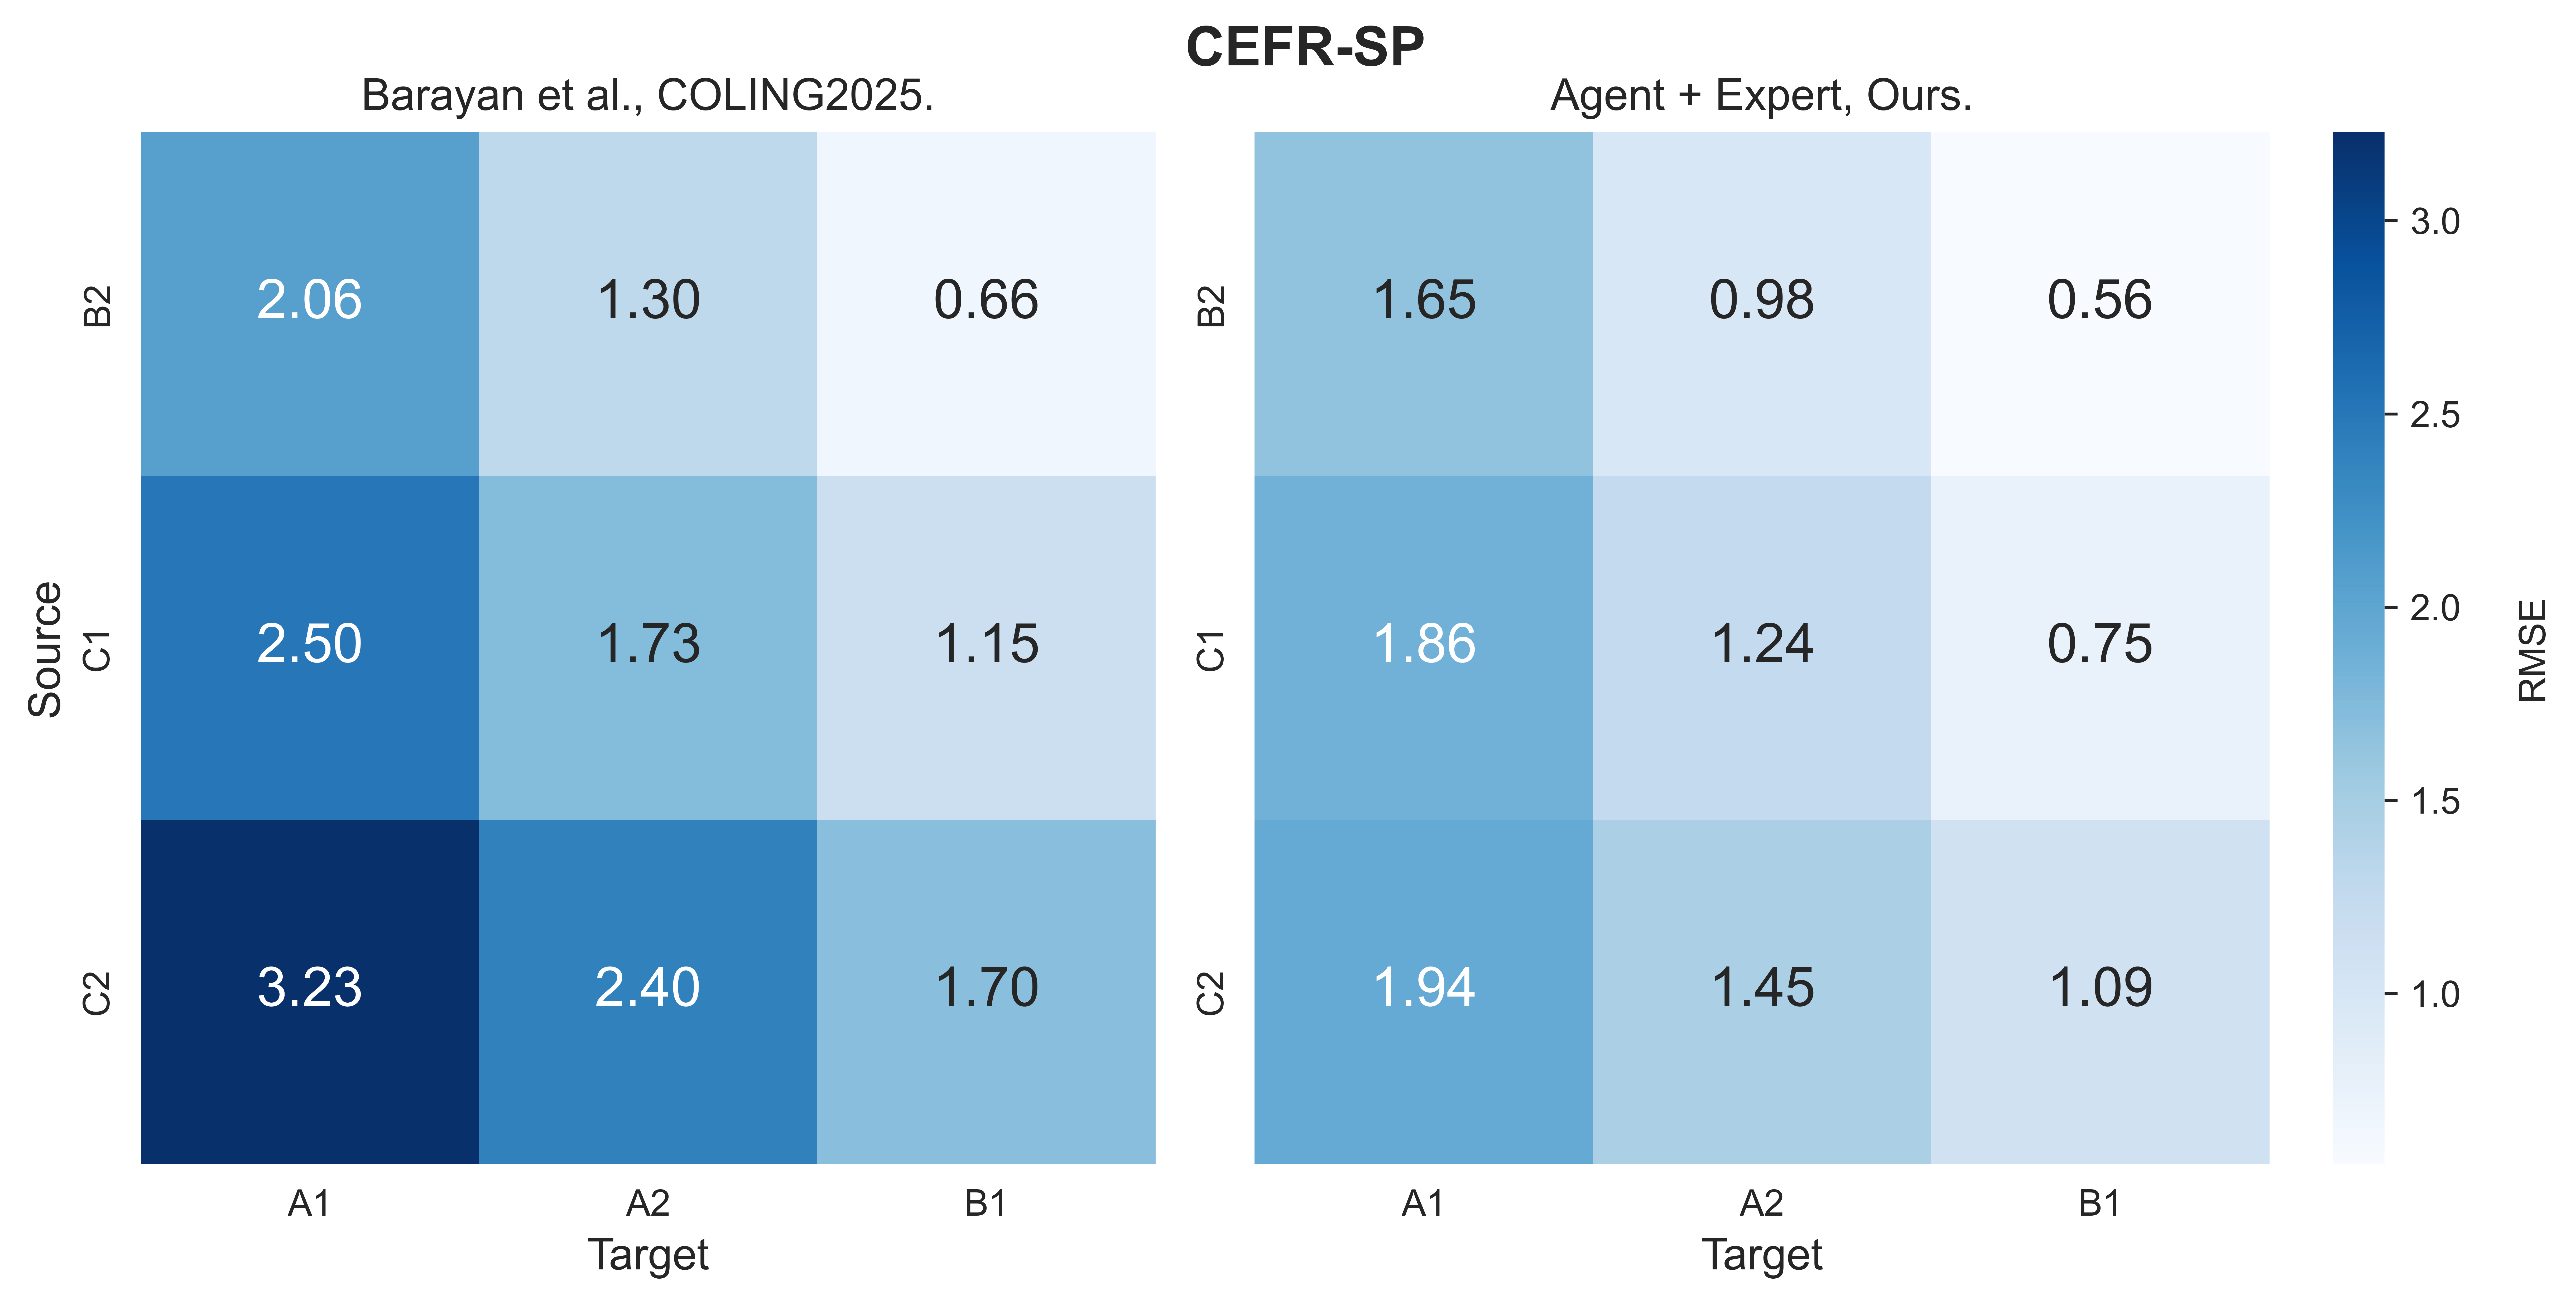

In [8]:
baseline = np.array([[2.06, 1.30, 0.66],
                   [2.50, 1.73, 1.15],
                   [3.23, 2.40, 1.70]])

agent_expert = np.array([[1.65, 0.98, 0.56],
                         [1.86, 1.24, 0.75],
                         [1.94, 1.45, 1.09]])

# 统一颜色范围
vmin = min(baseline.min(), agent_expert.min())
vmax = max(baseline.max(), agent_expert.max())

# 创建一个包含两个子图的图形
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=1000, gridspec_kw={'width_ratios': [1, 1.25]})

x_labels = ['A1', 'A2', 'B1']
y_labels = ['B2', 'C1', 'C2']

# 在第一个子图中绘制第一个数组的热力图
cmap = "Blues"
sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
axes[0].set_xlabel('Target', fontsize = 12)
axes[0].set_ylabel('Source', fontsize = 12)

# 在第二个子图中绘制第二个数组的热力图
heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
axes[1].set_xlabel('Target', fontsize = 12)
# axes[1].set_ylabel('Source', fontsize = 12)

# 获取颜色条对象
cbar = heatmap.collections[0].colorbar
# 为颜色条添加标签
cbar.set_label('RMSE', rotation=90, labelpad=15)

# 给整个图片添加标题
fig.suptitle('CEFR-SP', fontsize=15, fontweight='bold')

# 显示图形
plt.tight_layout()
# 调整子图布局，为标题留出空间
plt.subplots_adjust(top=0.9)
# plt.savefig(os.path.join(SAVEDIR, f"img/CEFR-SP/CEFR-SP_agent-expert_rmse.jpg"), dpi = 1000, bbox_inches='tight')
plt.show()
plt.close()

In [7]:
cefrsp_matrix_adjacc = dict()
cefrsp_matrix_exaacc = dict()

for expId in ["29", "28"]:  # 29 -> baseline; 28 -> agent+expert
    df_agent_expert = pd.read_csv(f"LLMGeneration/CEFR-SP/en_few-shot_{expId}.csv")
    label_all = [1 for _ in range(len(df_agent_expert))] + [2 for _ in range(len(df_agent_expert))] + [3 for _ in range(len(df_agent_expert))] 
    pred_all = df_agent_expert["pred_1"].tolist() + df_agent_expert["pred_2"].tolist() + df_agent_expert["pred_3"].tolist()
    correlation, p_value = spearmanr(label_all, pred_all)
    autometric_dict = {
        "Cor: ": round(correlation, 2),
        "p_value": round(p_value, 5),
        "AdjAcc": round(adjacency_accuracy(label_all, pred_all)*100, 2),
        "ExAcc": round(exact_accuracy(label_all, pred_all)*100, 2),
        "RMSE": round(calculate_rmse(label_all, pred_all), 2),
    }
    print(expId, autometric_dict)
    rmse_matrix, adjacc_matrix, exacc_matrix = [], [], []
    for source in [4, 5, 6]:
        tmp_rmse, tmp_adjacc, tmp_exacc = [], [], []
        df_ = df_agent_expert.loc[df_agent_expert["Rating"] == source]
        for target in [1, 2, 3]:
            pred_ = df_[f"pred_{target}"].tolist()
            label_ = [target for _ in range(len(pred_))]
            tmp_rmse.append(round(calculate_rmse(label_, pred_), 2))
            tmp_adjacc.append(round(adjacency_accuracy(label_, pred_)*100, 2))
            tmp_exacc.append(round(exact_accuracy(label_, pred_)*100, 2))
        rmse_matrix.append(tmp_rmse)
        adjacc_matrix.append(tmp_adjacc)
        exacc_matrix.append(tmp_exacc)
    cefrsp_matrix_adjacc[f"en_{expId}"] = np.array(adjacc_matrix)
    cefrsp_matrix_exaacc[f"en_{expId}"] = np.array(exacc_matrix)
    print(np.array(cefrsp_matrix_adjacc))
    print()

29 {'Cor: ': 0.24, 'p_value': 0.0, 'AdjAcc': 54.2, 'ExAcc': 16.87, 'RMSE': 1.77}
{'en_29': array([[20.42, 80.28, 92.96],
       [19.25, 60.96, 83.42],
       [ 9.72, 36.11, 52.78]])}

28 {'Cor: ': 0.38, 'p_value': 0.0, 'AdjAcc': 72.57, 'ExAcc': 29.18, 'RMSE': 1.32}
{'en_29': array([[20.42, 80.28, 92.96],
       [19.25, 60.96, 83.42],
       [ 9.72, 36.11, 52.78]]), 'en_28': array([[45.07, 92.96, 97.89],
       [36.9 , 82.35, 93.05],
       [40.28, 73.61, 81.94]])}



### Visual CEFR-SP **__Adjacency Acc__** Heatmap between Barayan et al., COLING2025. with ours agent+expert

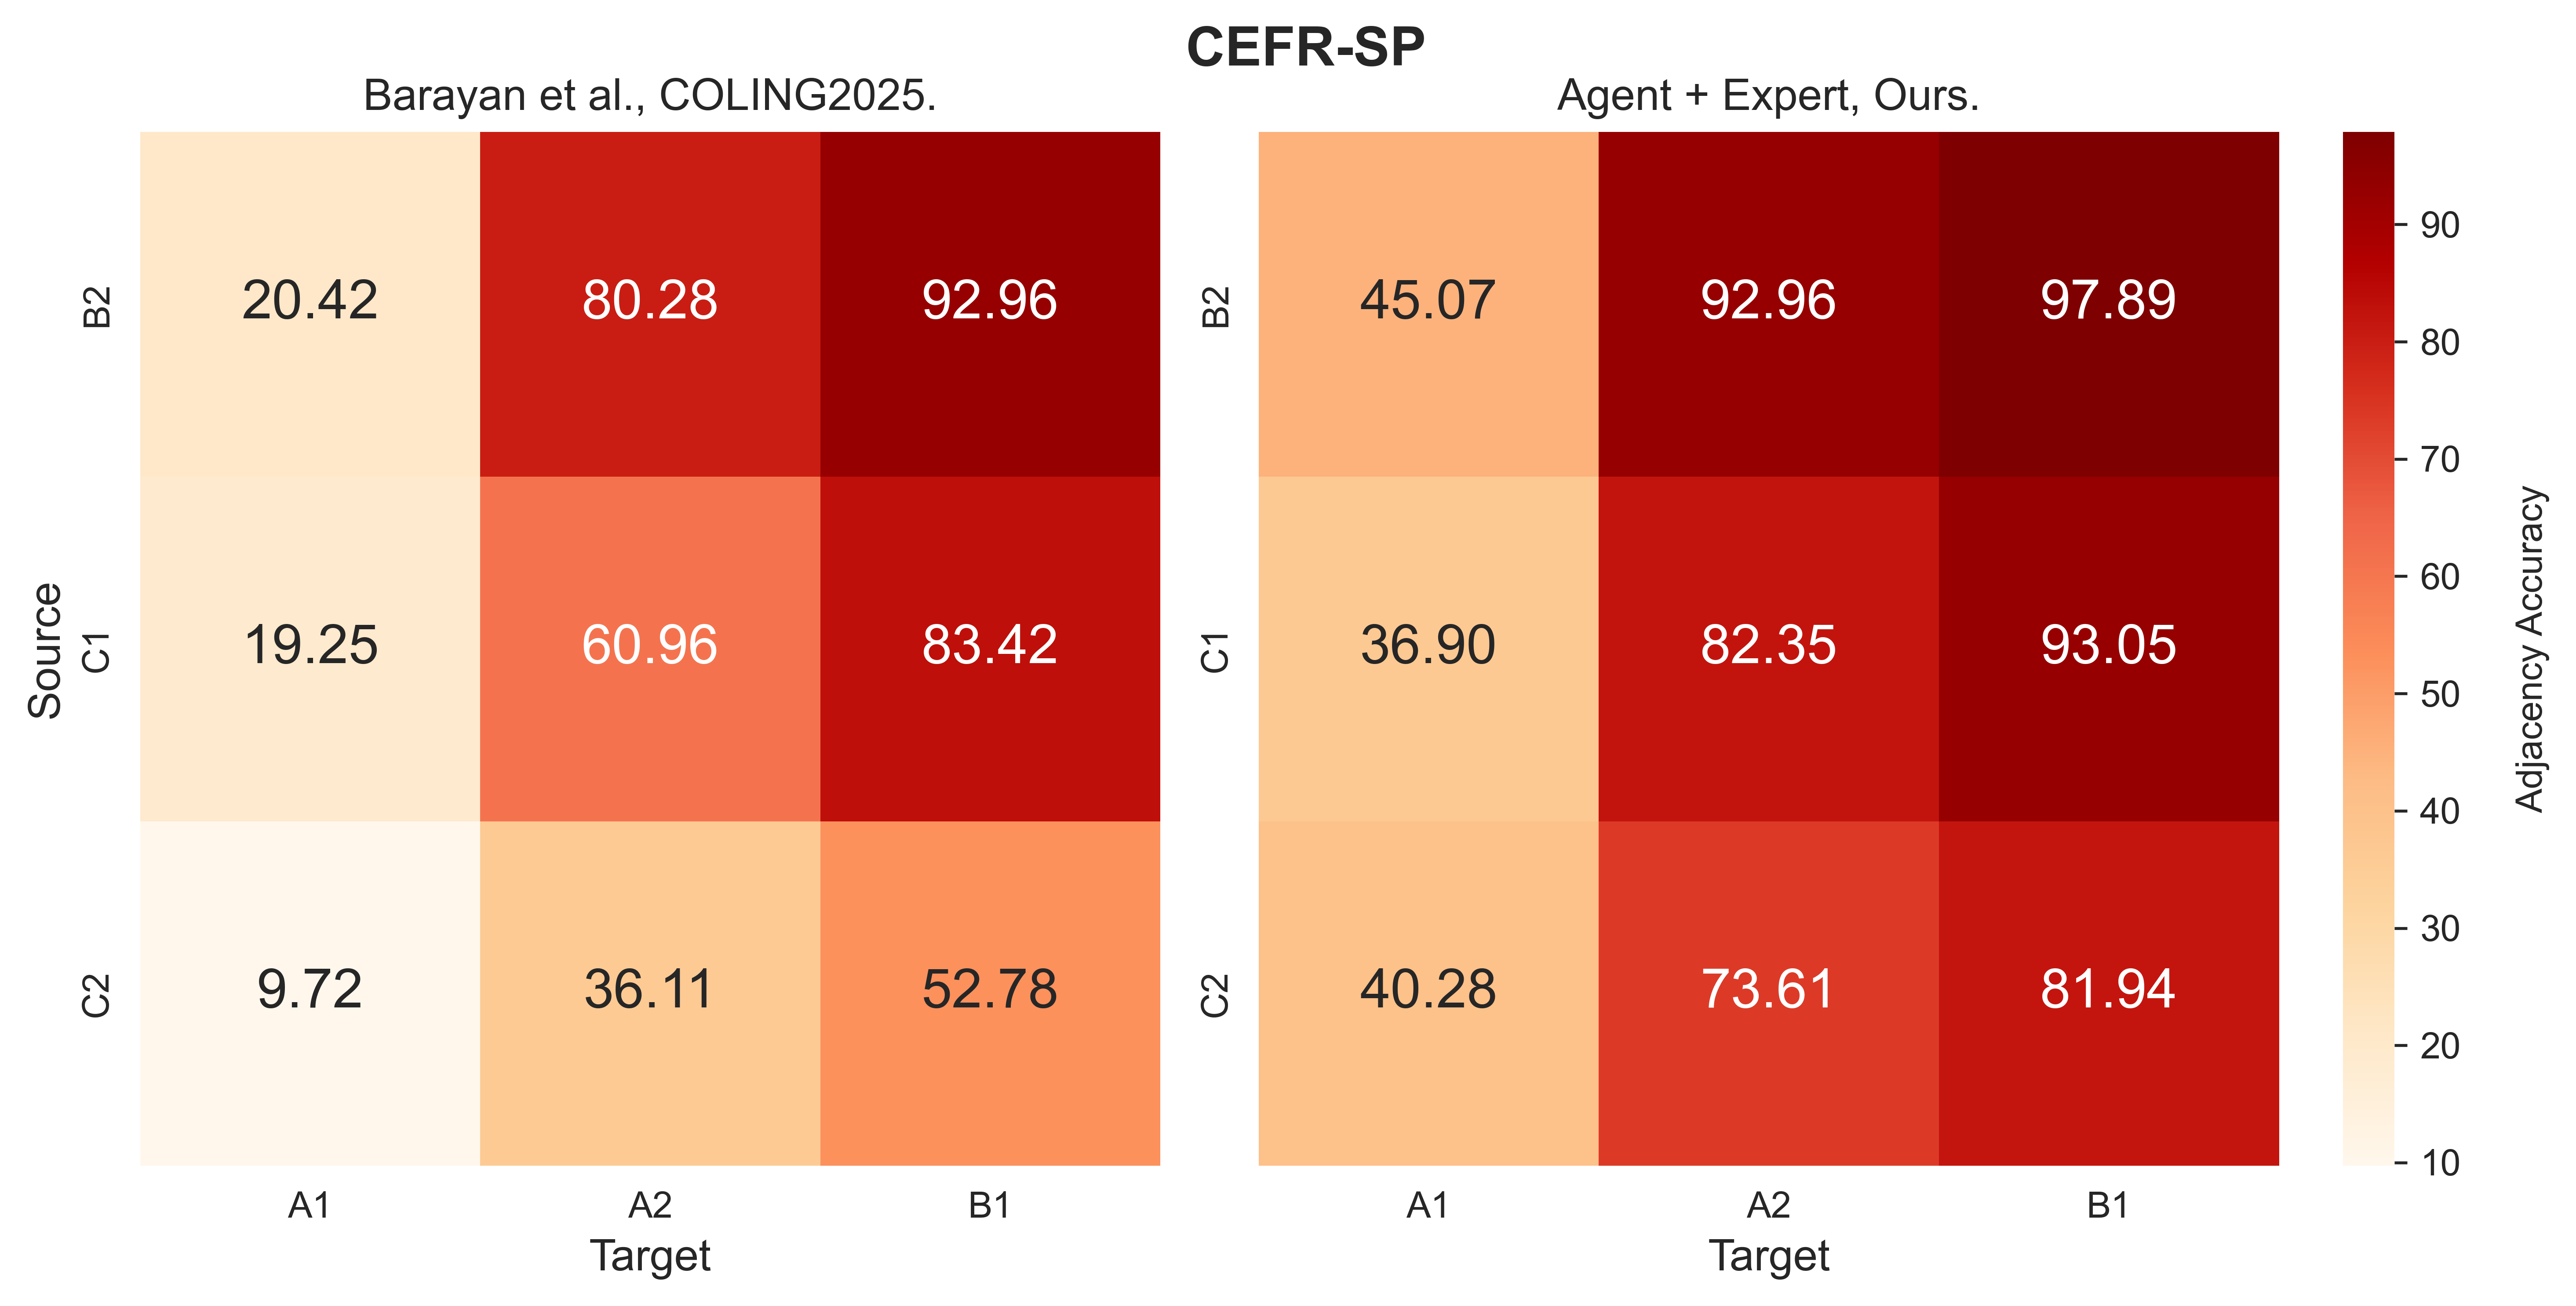

In [8]:
for lang in ["en"]:
    baseline = cefrsp_matrix_adjacc[f"{lang}_29"]
    agent_expert = cefrsp_matrix_adjacc[f"{lang}_28"]
    
    # 统一颜色范围
    vmin = min(baseline.min(), agent_expert.min())
    vmax = max(baseline.max(), agent_expert.max())
    
    # 创建一个包含两个子图的图形
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=600, gridspec_kw={'width_ratios': [1, 1.25]})
    
    x_labels = ['A1', 'A2', 'B1']
    y_labels = ['B2', 'C1', 'C2']
    
    # 在第一个子图中绘制第一个数组的热力图
    cmap = "OrRd"
    sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
    axes[0].set_xlabel('Target', fontsize = 12)
    axes[0].set_ylabel('Source', fontsize = 12)
    
    # 在第二个子图中绘制第二个数组的热力图
    heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
    axes[1].set_xlabel('Target', fontsize = 12)
    # axes[1].set_ylabel('Source', fontsize = 12)
    
    # 获取颜色条对象
    cbar = heatmap.collections[0].colorbar
    # 为颜色条添加标签
    cbar.set_label('Adjacency Accuracy', rotation=90, labelpad=15)
    
    fig.suptitle(f'CEFR-SP', fontsize=15, fontweight='bold')
    
    # 显示图形
    plt.tight_layout()
    # 调整子图布局，为标题留出空间
    plt.subplots_adjust(top=0.9)
    plt.savefig(os.path.join(SAVEDIR, f"img/CEFR-SP/CEFR-SP_agent-expert_adjacc.jpg"), dpi = 1000, bbox_inches='tight')
    plt.show()
    plt.close()

### Visual CEFR-SP Exact Accuracy Heatmap between Barayan et al., COLING2025. with ours agent+expert

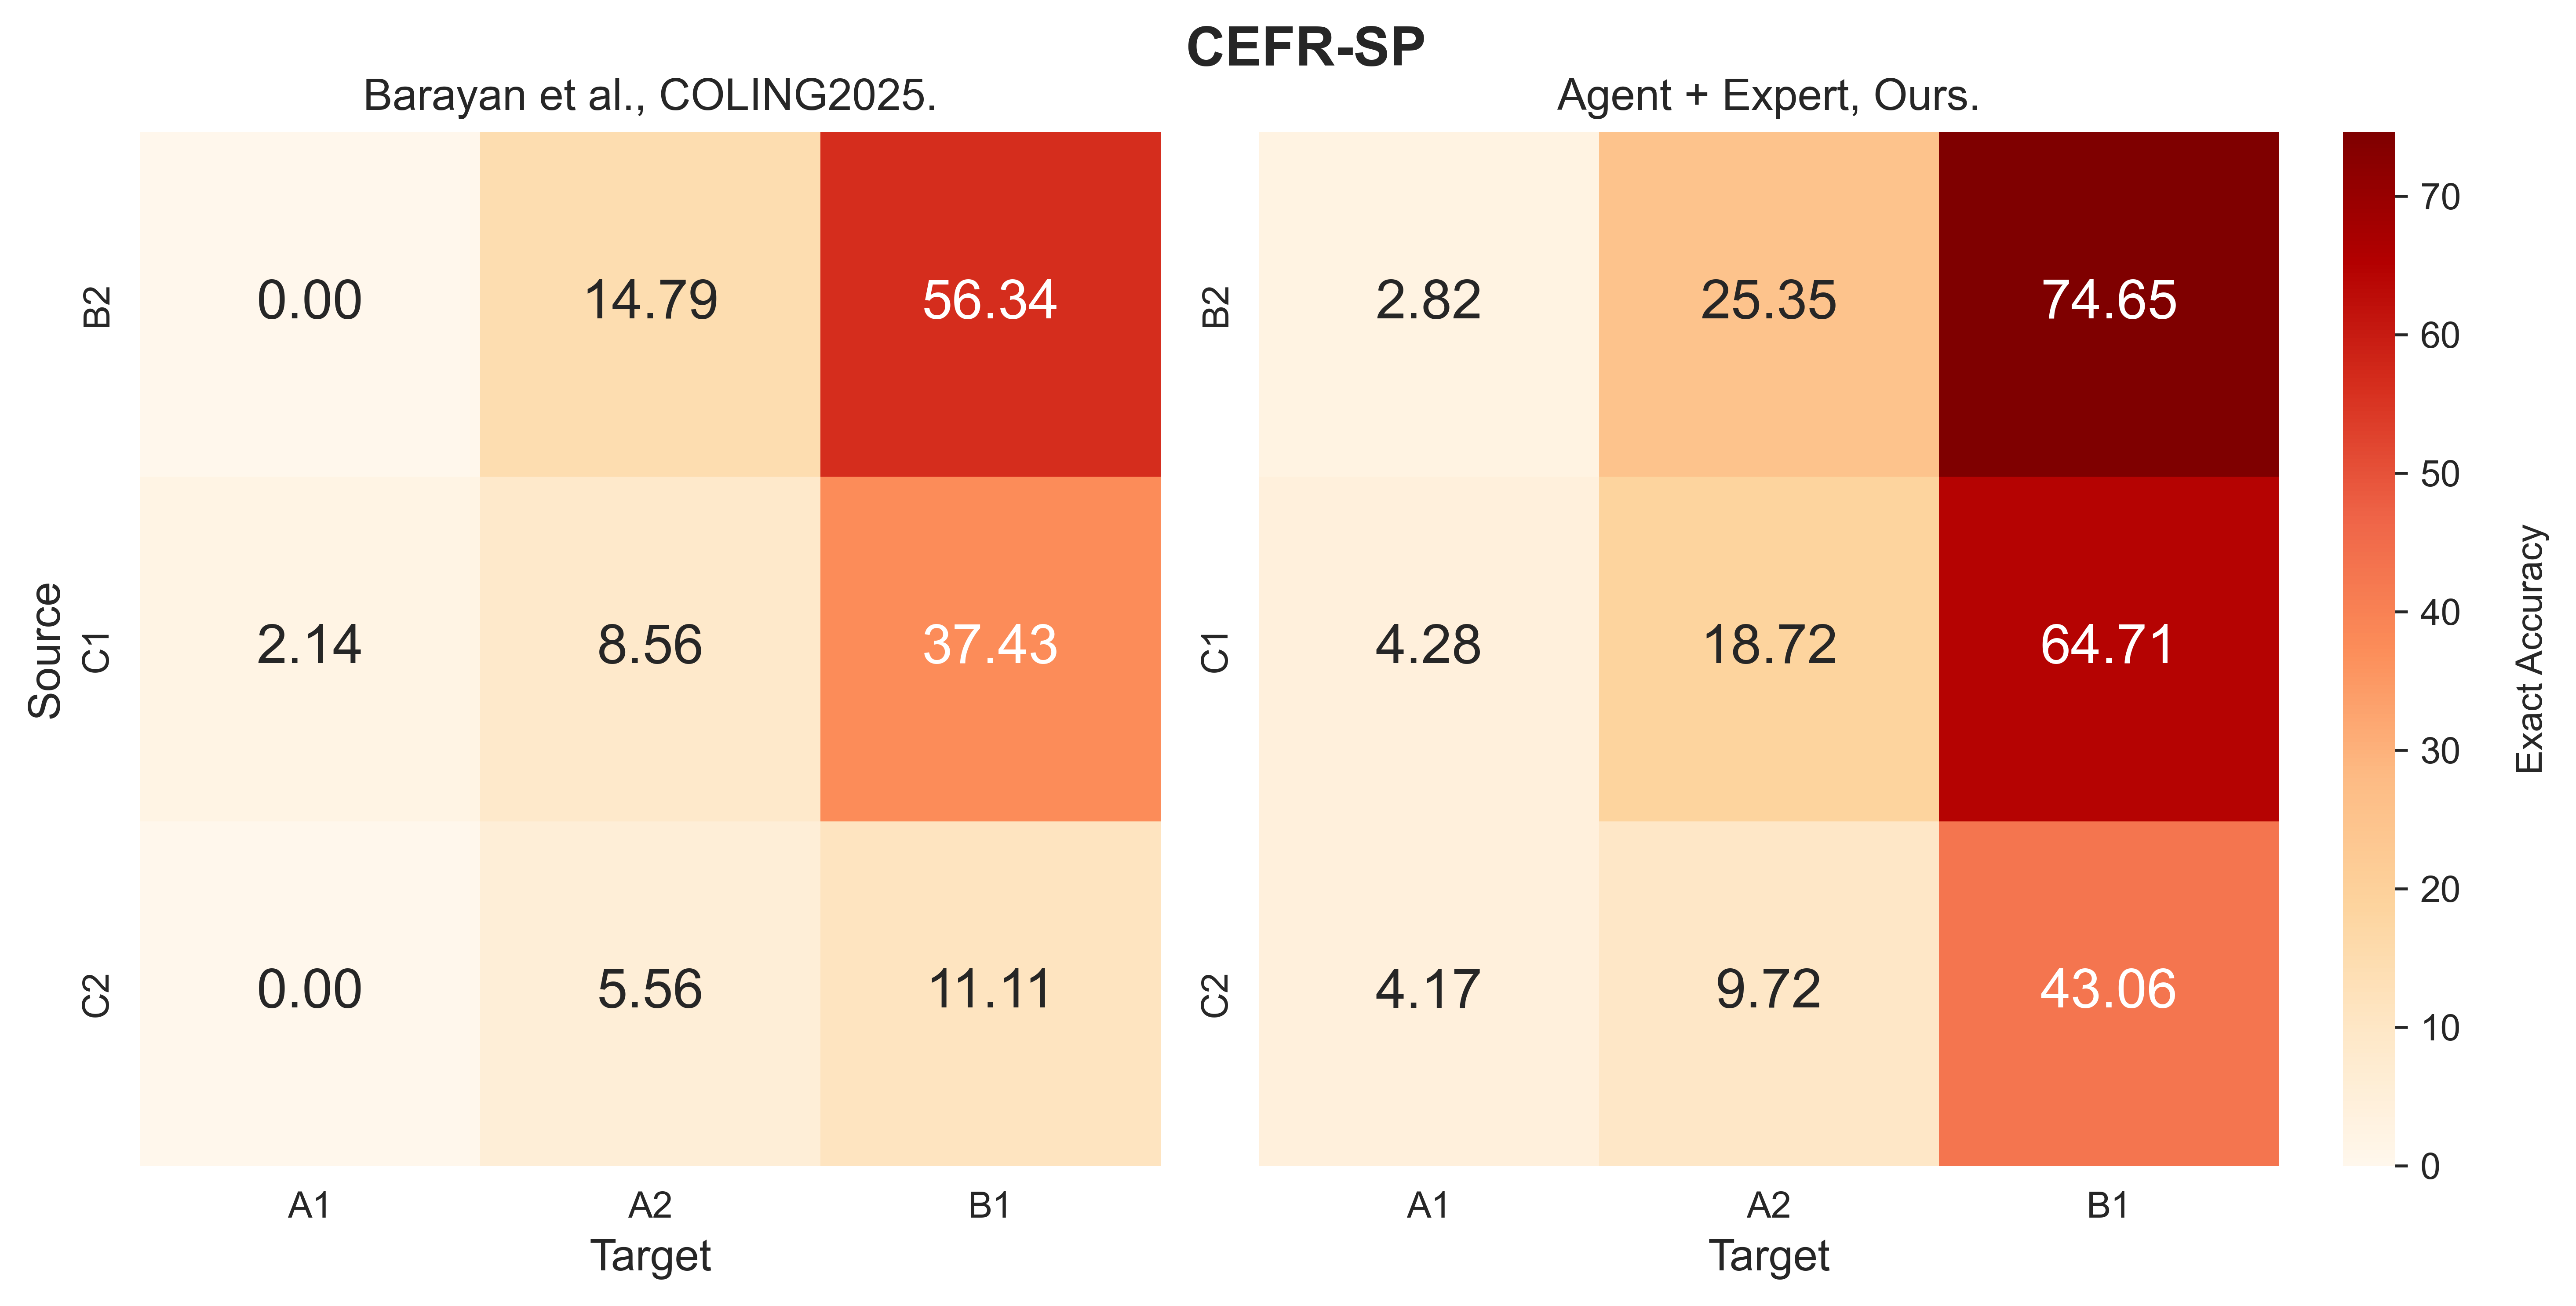

In [9]:
for lang in ["en"]:
    baseline = cefrsp_matrix_exaacc[f"{lang}_29"]
    agent_expert = cefrsp_matrix_exaacc[f"{lang}_28"]
    
    # 统一颜色范围
    vmin = min(baseline.min(), agent_expert.min())
    vmax = max(baseline.max(), agent_expert.max())
    
    # 创建一个包含两个子图的图形
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=600, gridspec_kw={'width_ratios': [1, 1.25]})
    
    x_labels = ['A1', 'A2', 'B1']
    y_labels = ['B2', 'C1', 'C2']
    
    # 在第一个子图中绘制第一个数组的热力图
    cmap = "OrRd"
    sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
    axes[0].set_xlabel('Target', fontsize = 12)
    axes[0].set_ylabel('Source', fontsize = 12)
    
    # 在第二个子图中绘制第二个数组的热力图
    heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
    axes[1].set_xlabel('Target', fontsize = 12)
    # axes[1].set_ylabel('Source', fontsize = 12)
    
    # 获取颜色条对象
    cbar = heatmap.collections[0].colorbar
    # 为颜色条添加标签
    cbar.set_label('Exact Accuracy', rotation=90, labelpad=15)
    
    fig.suptitle(f'CEFR-SP', fontsize=15, fontweight='bold')
    
    # 显示图形
    plt.tight_layout()
    # 调整子图布局，为标题留出空间
    plt.subplots_adjust(top=0.9)
    plt.savefig(os.path.join(SAVEDIR, f"img/CEFR-SP/CEFR-SP_agent-expert_exaacc.jpg"), dpi = 1000, bbox_inches='tight')
    plt.show()
    plt.close()

### README, Agent + Expert
### Auto-evaluation

In [9]:
rmse_matrix_dict = dict()
adjacc_matrix_dict = dict()
exacc_matrix_dict = dict()

In [11]:
expId = "baseline"
for lang in ["ar", "en", "fr", "hi", "ru"]:
    df_agent_expert = pd.read_csv(f"LLMGeneration/README/{lang}/{lang}_few-shot_{expId}.csv")
    label_all = [1 for _ in range(len(df_agent_expert))] + [2 for _ in range(len(df_agent_expert))] + [3 for _ in range(len(df_agent_expert))] 
    pred_all = df_agent_expert["pred_1"].tolist() + df_agent_expert["pred_2"].tolist() + df_agent_expert["pred_3"].tolist()
    correlation, p_value = spearmanr(label_all, pred_all)
    autometric_dict = {
        "Cor: ": round(correlation, 2),
        "p_value": round(p_value, 5),
        "AdjAcc": round(adjacency_accuracy(label_all, pred_all)*100, 2),
        "ExAcc": round(exact_accuracy(label_all, pred_all)*100, 2),
        "RMSE": round(calculate_rmse(label_all, pred_all), 2),
    }
    print(lang, autometric_dict)
    rmse_matrix, adjacc_matrix, exacc_matrix = [], [], []
    for source in [4, 5, 6]:
        tmp_rmse, tmp_adjacc, tmp_exacc = [], [], []
        df_ = df_agent_expert.loc[df_agent_expert["Rating"] == source]
        for target in [1, 2, 3]:
            pred_ = df_[f"pred_{target}"].tolist()
            label_ = [target for _ in range(len(pred_))]
            tmp_rmse.append(round(calculate_rmse(label_, pred_), 2))
            tmp_adjacc.append(round(adjacency_accuracy(label_, pred_)*100, 2))
            tmp_exacc.append(round(exact_accuracy(label_, pred_)*100, 2))
        rmse_matrix.append(tmp_rmse)
        adjacc_matrix.append(tmp_adjacc)
        exacc_matrix.append(tmp_exacc)
    rmse_matrix_dict[f"{lang}_{expId}"] = np.array(rmse_matrix)
    adjacc_matrix_dict[f"{lang}_{expId}"] = np.array(adjacc_matrix)
    exacc_matrix_dict[f"{lang}_{expId}"] = np.array(exacc_matrix)
    print(np.array(rmse_matrix))
    print()

ar {'Cor: ': 0.19, 'p_value': 0.00055, 'AdjAcc': 61.99, 'ExAcc': 22.81, 'RMSE': 1.64}
[[2.07 1.28 0.73]
 [2.65 1.9  1.  ]
 [1.87 1.73 1.41]]

en {'Cor: ': 0.32, 'p_value': 0.0, 'AdjAcc': 79.55, 'ExAcc': 31.57, 'RMSE': 1.18}
[[1.49 0.93 0.68]
 [1.72 1.14 0.71]
 [2.52 1.83 0.91]]

fr {'Cor: ': 0.35, 'p_value': 0.0, 'AdjAcc': 67.06, 'ExAcc': 25.79, 'RMSE': 1.39}
[[1.66 1.   0.47]
 [1.94 1.79 0.85]
 [2.14 1.71 1.04]]

hi {'Cor: ': 0.09, 'p_value': 0.16777, 'AdjAcc': 52.44, 'ExAcc': 15.11, 'RMSE': 2.23}
[[2.17 1.71 1.47]
 [2.86 2.22 1.4 ]
 [3.74 2.72 2.34]]

ru {'Cor: ': 0.39, 'p_value': 0.0, 'AdjAcc': 85.71, 'ExAcc': 42.86, 'RMSE': 1.04}
[[1.22 0.82 0.87]
 [1.45 1.   0.82]
 [1.12 1.06 0.87]]



In [12]:
# rmse_matrix_dict
# adjacc_matrix_dict
exacc_matrix_dict

{'ar_17': array([[ 0.  , 41.18, 60.29],
        [ 0.  , 25.  , 57.14],
        [ 0.  , 55.56, 44.44]]),
 'en_17': array([[21.74, 66.3 , 55.43],
        [ 2.94, 41.18, 64.71],
        [ 0.  , 33.33, 66.67]]),
 'fr_17': array([[ 0.  , 47.83, 78.26],
        [ 0.  , 15.38, 88.46],
        [ 0.  ,  8.33, 50.  ]]),
 'hi_17': array([[31.25, 46.88, 21.88],
        [ 6.67, 33.33, 33.33],
        [ 0.  , 23.08, 30.77]]),
 'ru_17': array([[52.94, 41.18, 41.18],
        [47.62, 47.62, 57.14],
        [87.5 , 50.  , 62.5 ]]),
 'ar_baseline': array([[ 0.  , 19.12, 60.29],
        [ 0.  ,  3.57, 32.14],
        [ 0.  , 38.89, 38.89]]),
 'en_baseline': array([[ 3.26, 42.39, 57.61],
        [ 2.94, 23.53, 58.82],
        [ 0.  ,  0.  , 16.67]]),
 'fr_baseline': array([[ 0.  , 13.04, 78.26],
        [ 0.  ,  7.69, 61.54],
        [ 0.  ,  0.  , 41.67]]),
 'hi_baseline': array([[12.5 , 28.12, 21.88],
        [ 3.33, 16.67, 20.  ],
        [ 0.  ,  7.69,  7.69]]),
 'ru_baseline': array([[41.18, 64.71, 50

### Visual README RMSE Heatmap between COLING2025 with ours agent+expert

In [ ]:
lang2desc = {
    "ar": "Arabic", "en": "English", "fr": "French", "hi": "Hindi", "ru": "Russian"
}
for lang in ["ar", "en", "fr", "hi", "ru"]:
    baseline = rmse_matrix_dict[f"{lang}_baseline"]
    
    agent_expert = rmse_matrix_dict[f"{lang}_17"]
    
    # 统一颜色范围
    vmin = min(baseline.min(), agent_expert.min())
    vmax = max(baseline.max(), agent_expert.max())
    
    # 创建一个包含两个子图的图形
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=600, gridspec_kw={'width_ratios': [1, 1.25]})
    
    x_labels = ['A1', 'A2', 'B1']
    y_labels = ['B2', 'C1', 'C2']
    
    # 在第一个子图中绘制第一个数组的热力图
    cmap = "Blues"
    sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
    axes[0].set_xlabel('Target', fontsize = 12)
    axes[0].set_ylabel('Source', fontsize = 12)
    
    # 在第二个子图中绘制第二个数组的热力图
    heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
    axes[1].set_xlabel('Target', fontsize = 12)
    # axes[1].set_ylabel('Source', fontsize = 12)
    
    # 获取颜色条对象
    cbar = heatmap.collections[0].colorbar
    # 为颜色条添加标签
    cbar.set_label('RMSE', rotation=90, labelpad=15)
    
    # 给整个图片添加标题
    fig.suptitle(f'README-{lang2desc[lang]}', fontsize=15, fontweight='bold')
    
    # 显示图形
    plt.tight_layout()
    # 调整子图布局，为标题留出空间
    plt.subplots_adjust(top=0.9)
    plt.savefig(os.path.join(SAVEDIR, f"img/README/{lang}/README-{lang}_agent-expert_rmse.jpg"), dpi = 1000, bbox_inches='tight')
    plt.show()
    plt.close()

### Visual README Adjacency Heatmap between COLING2025 with ours agent+expert

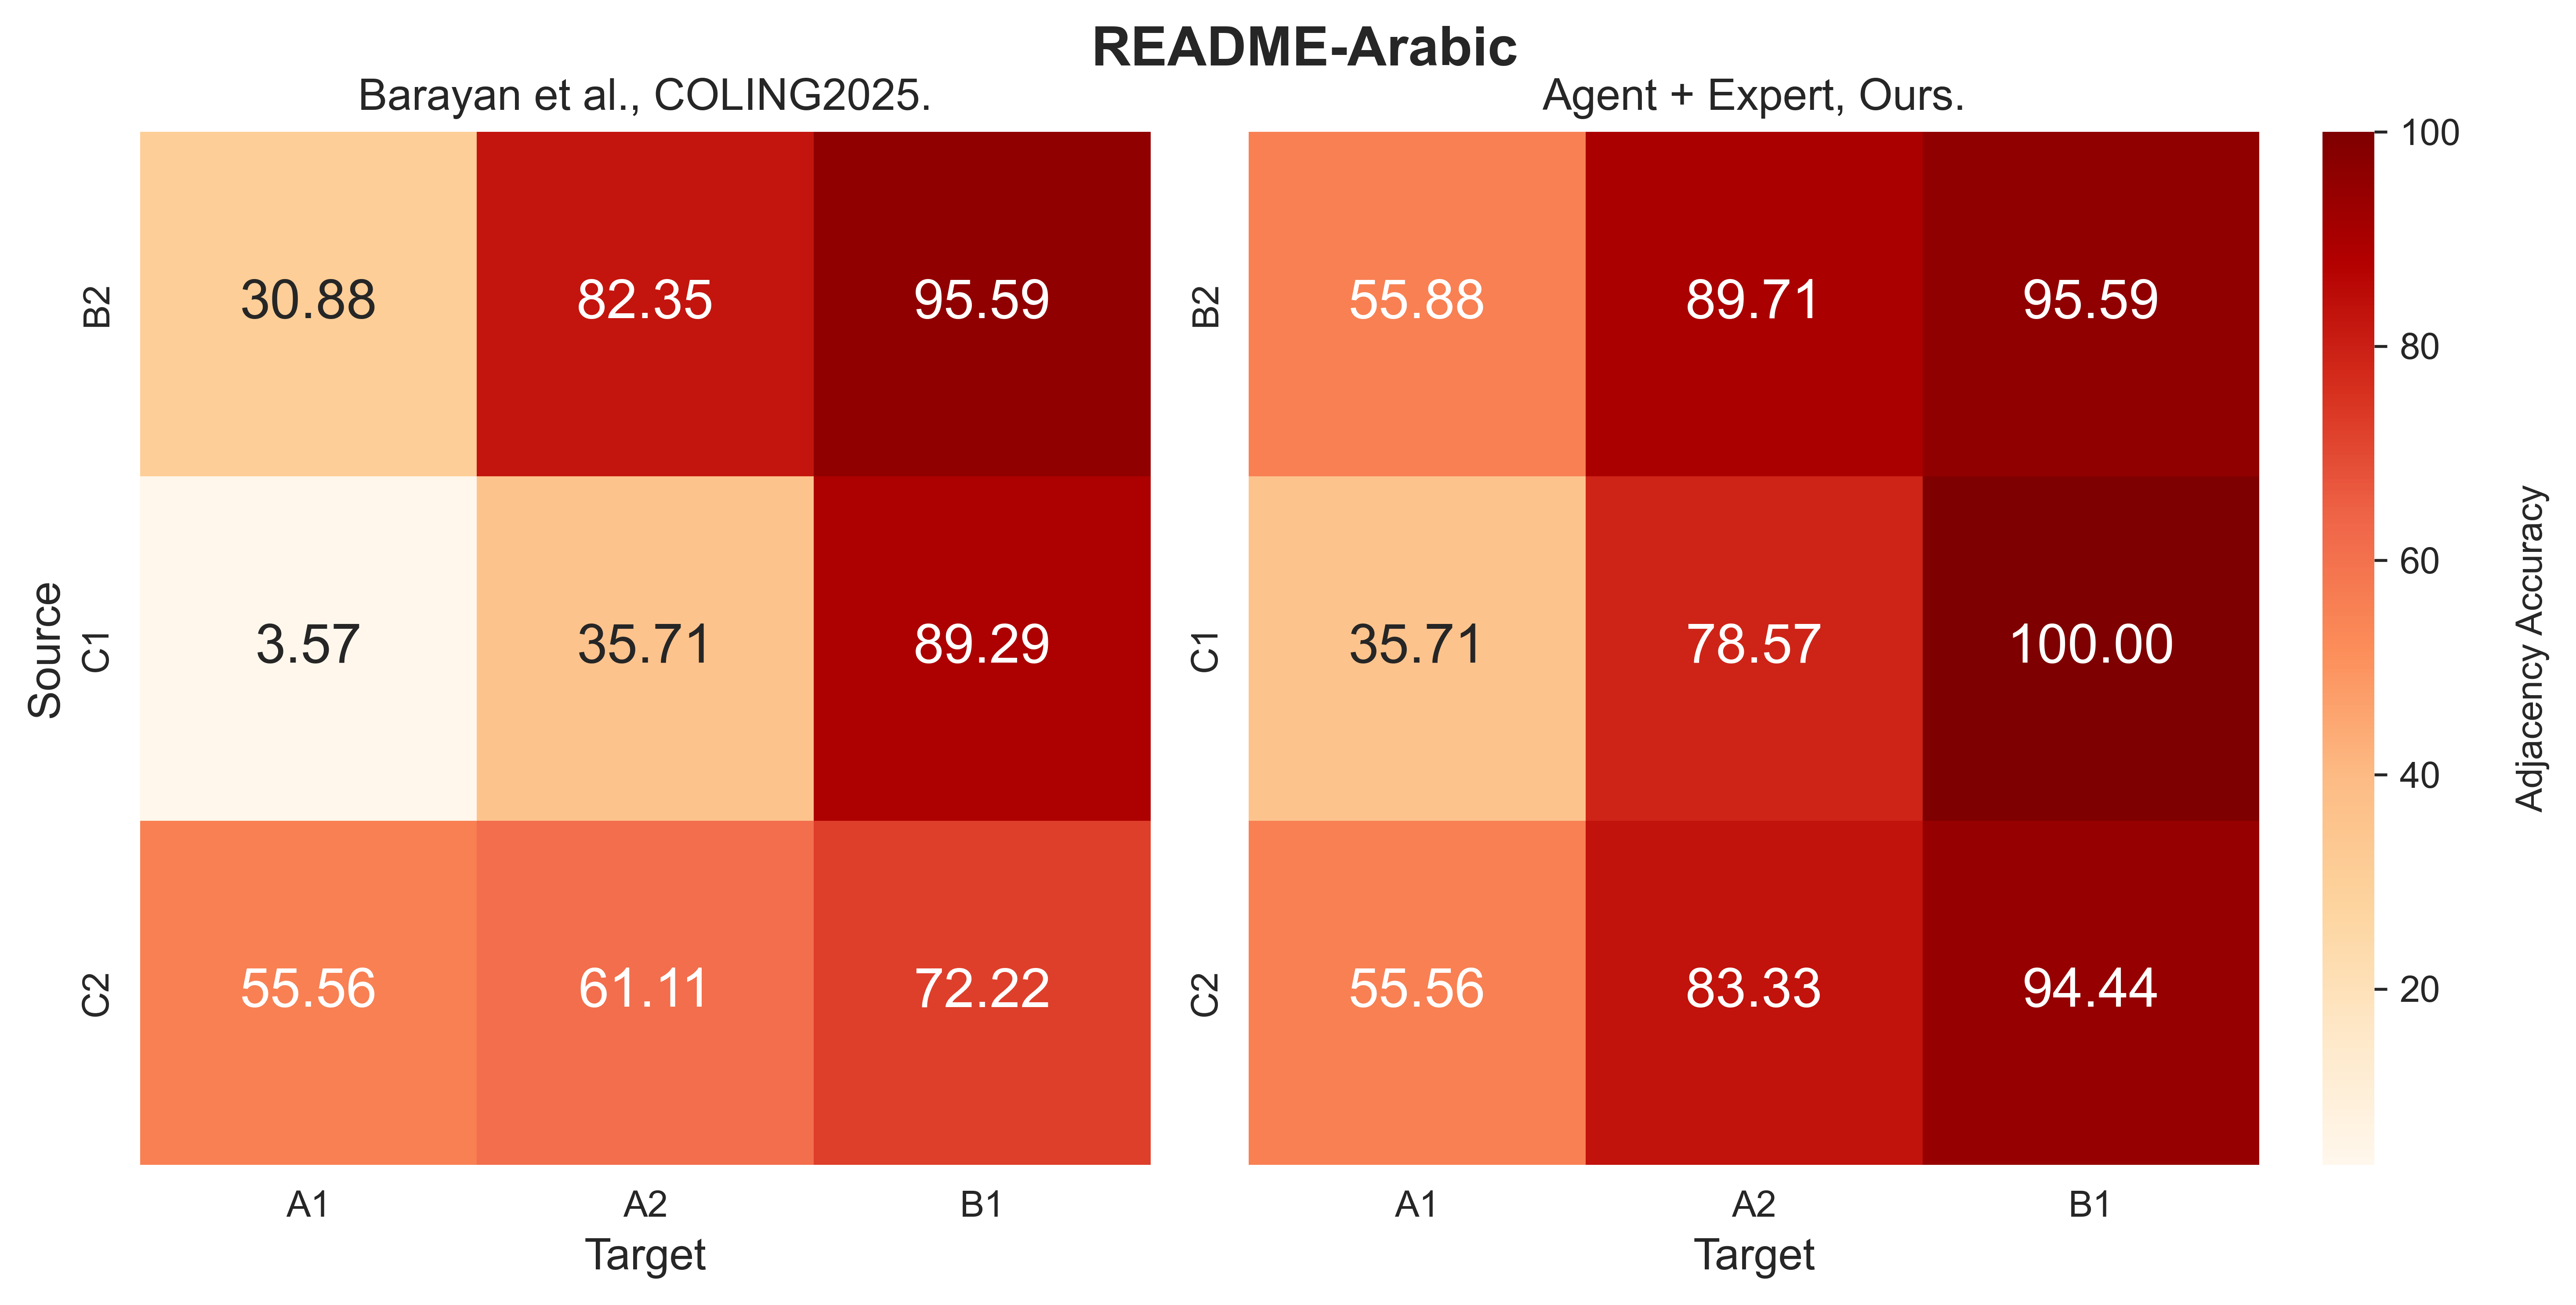

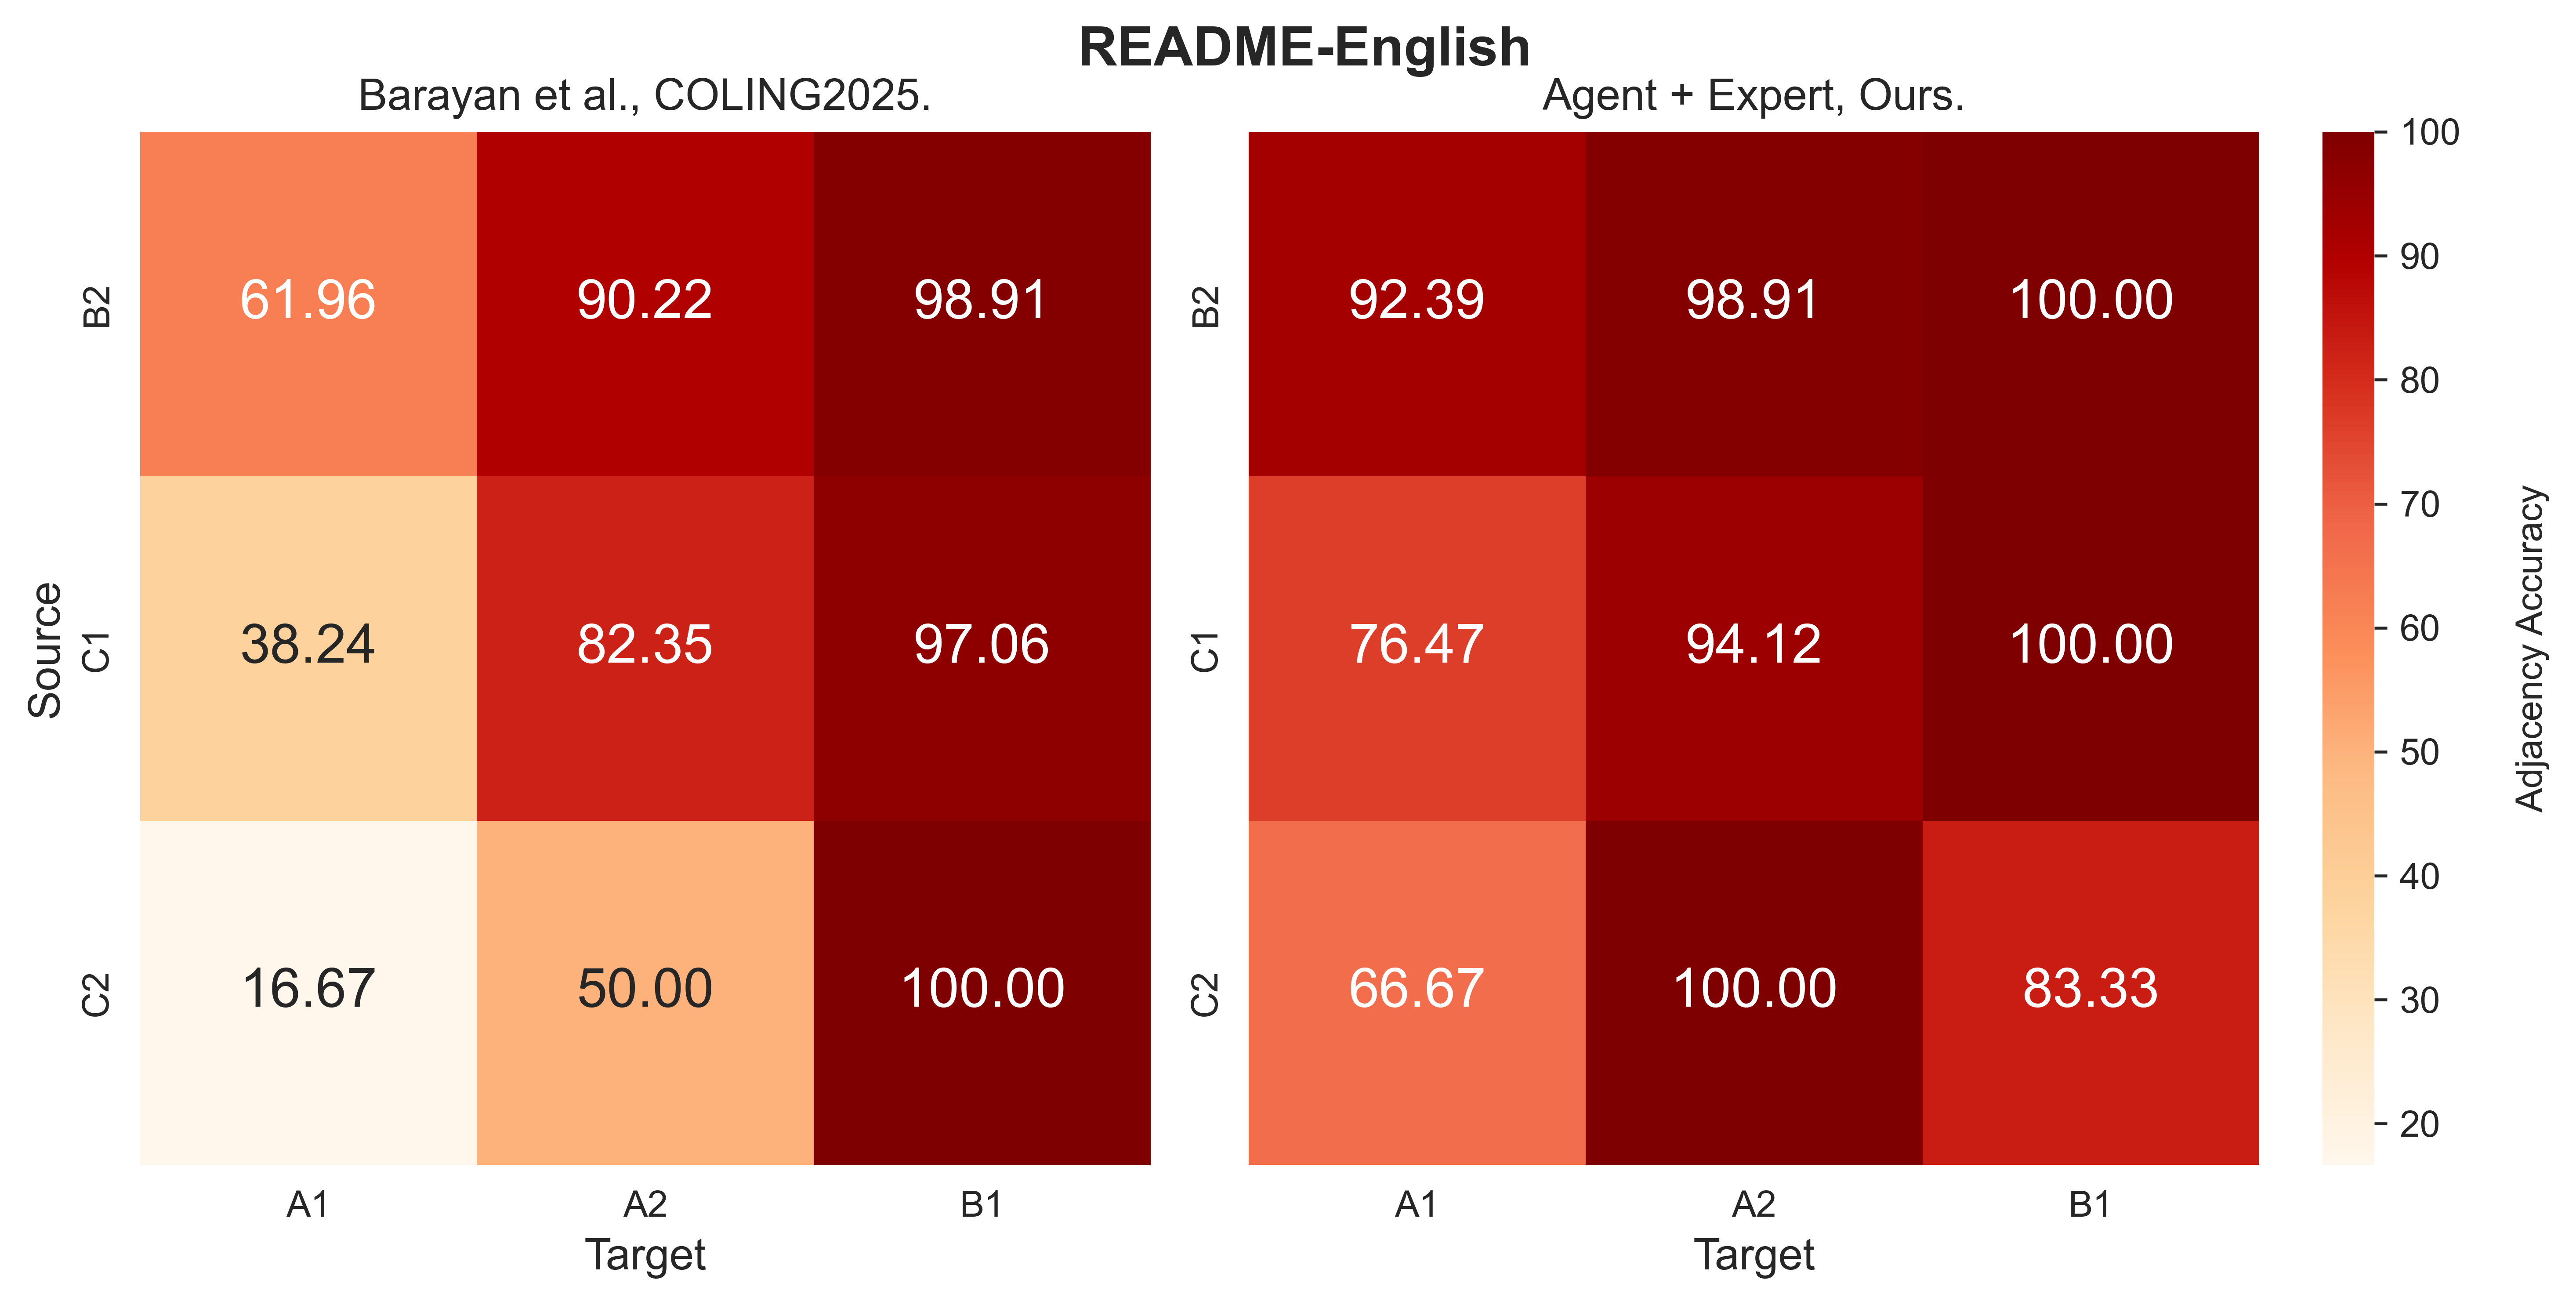

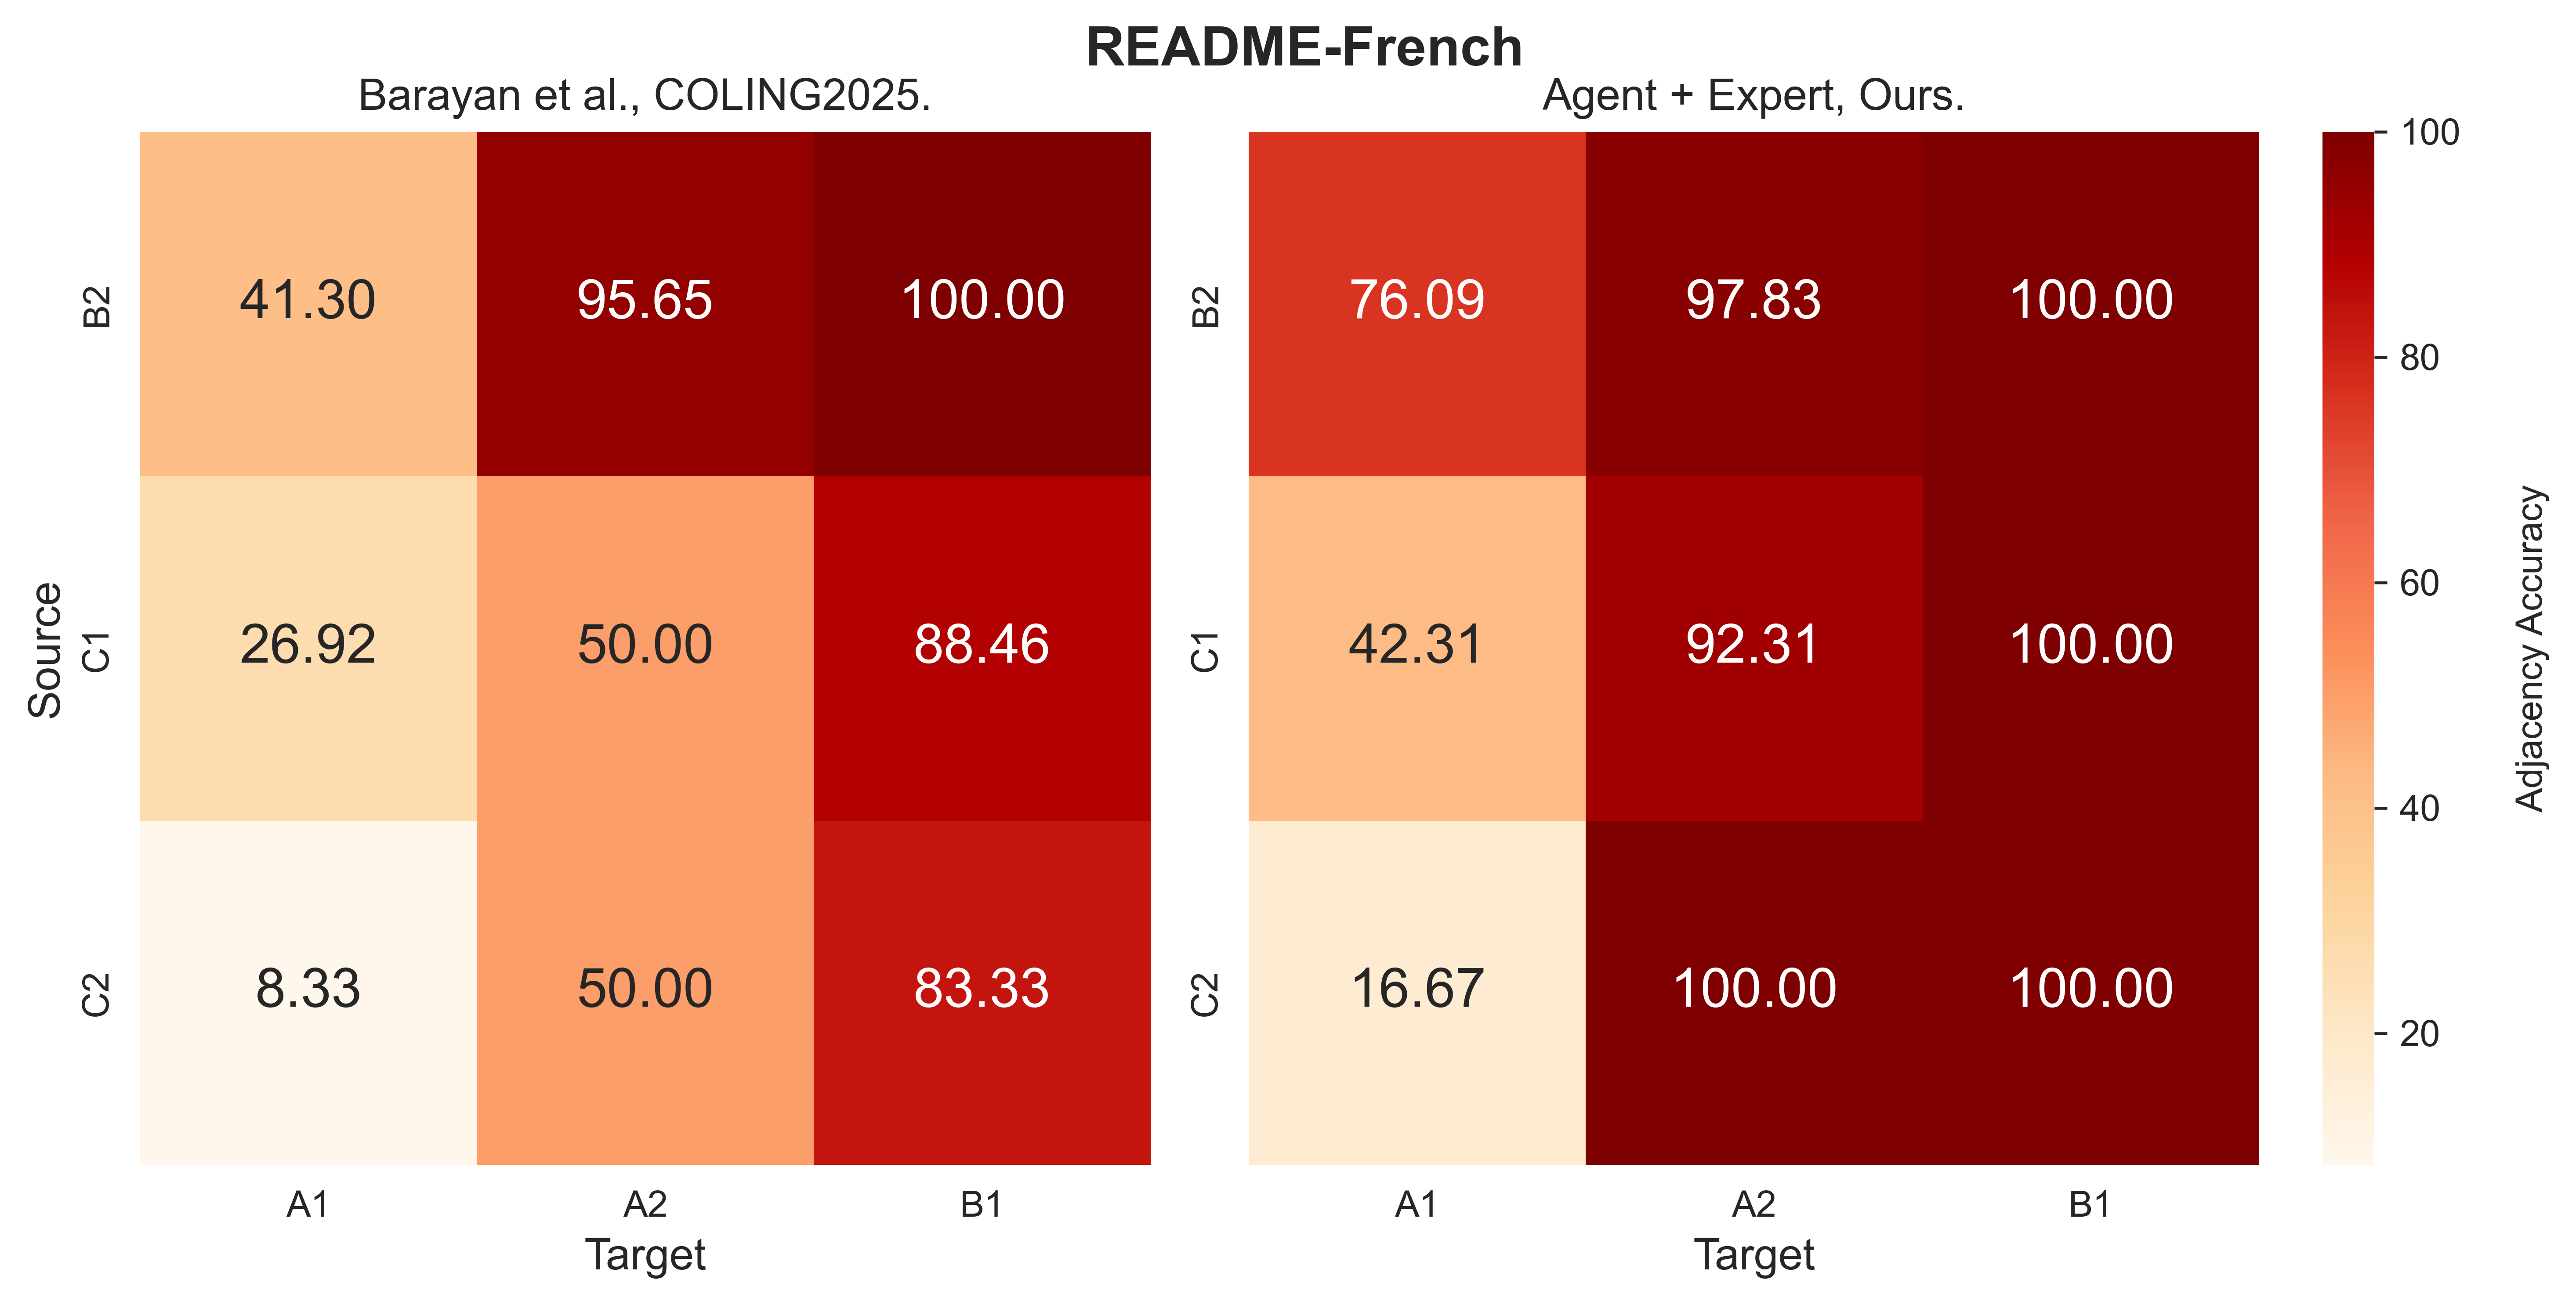

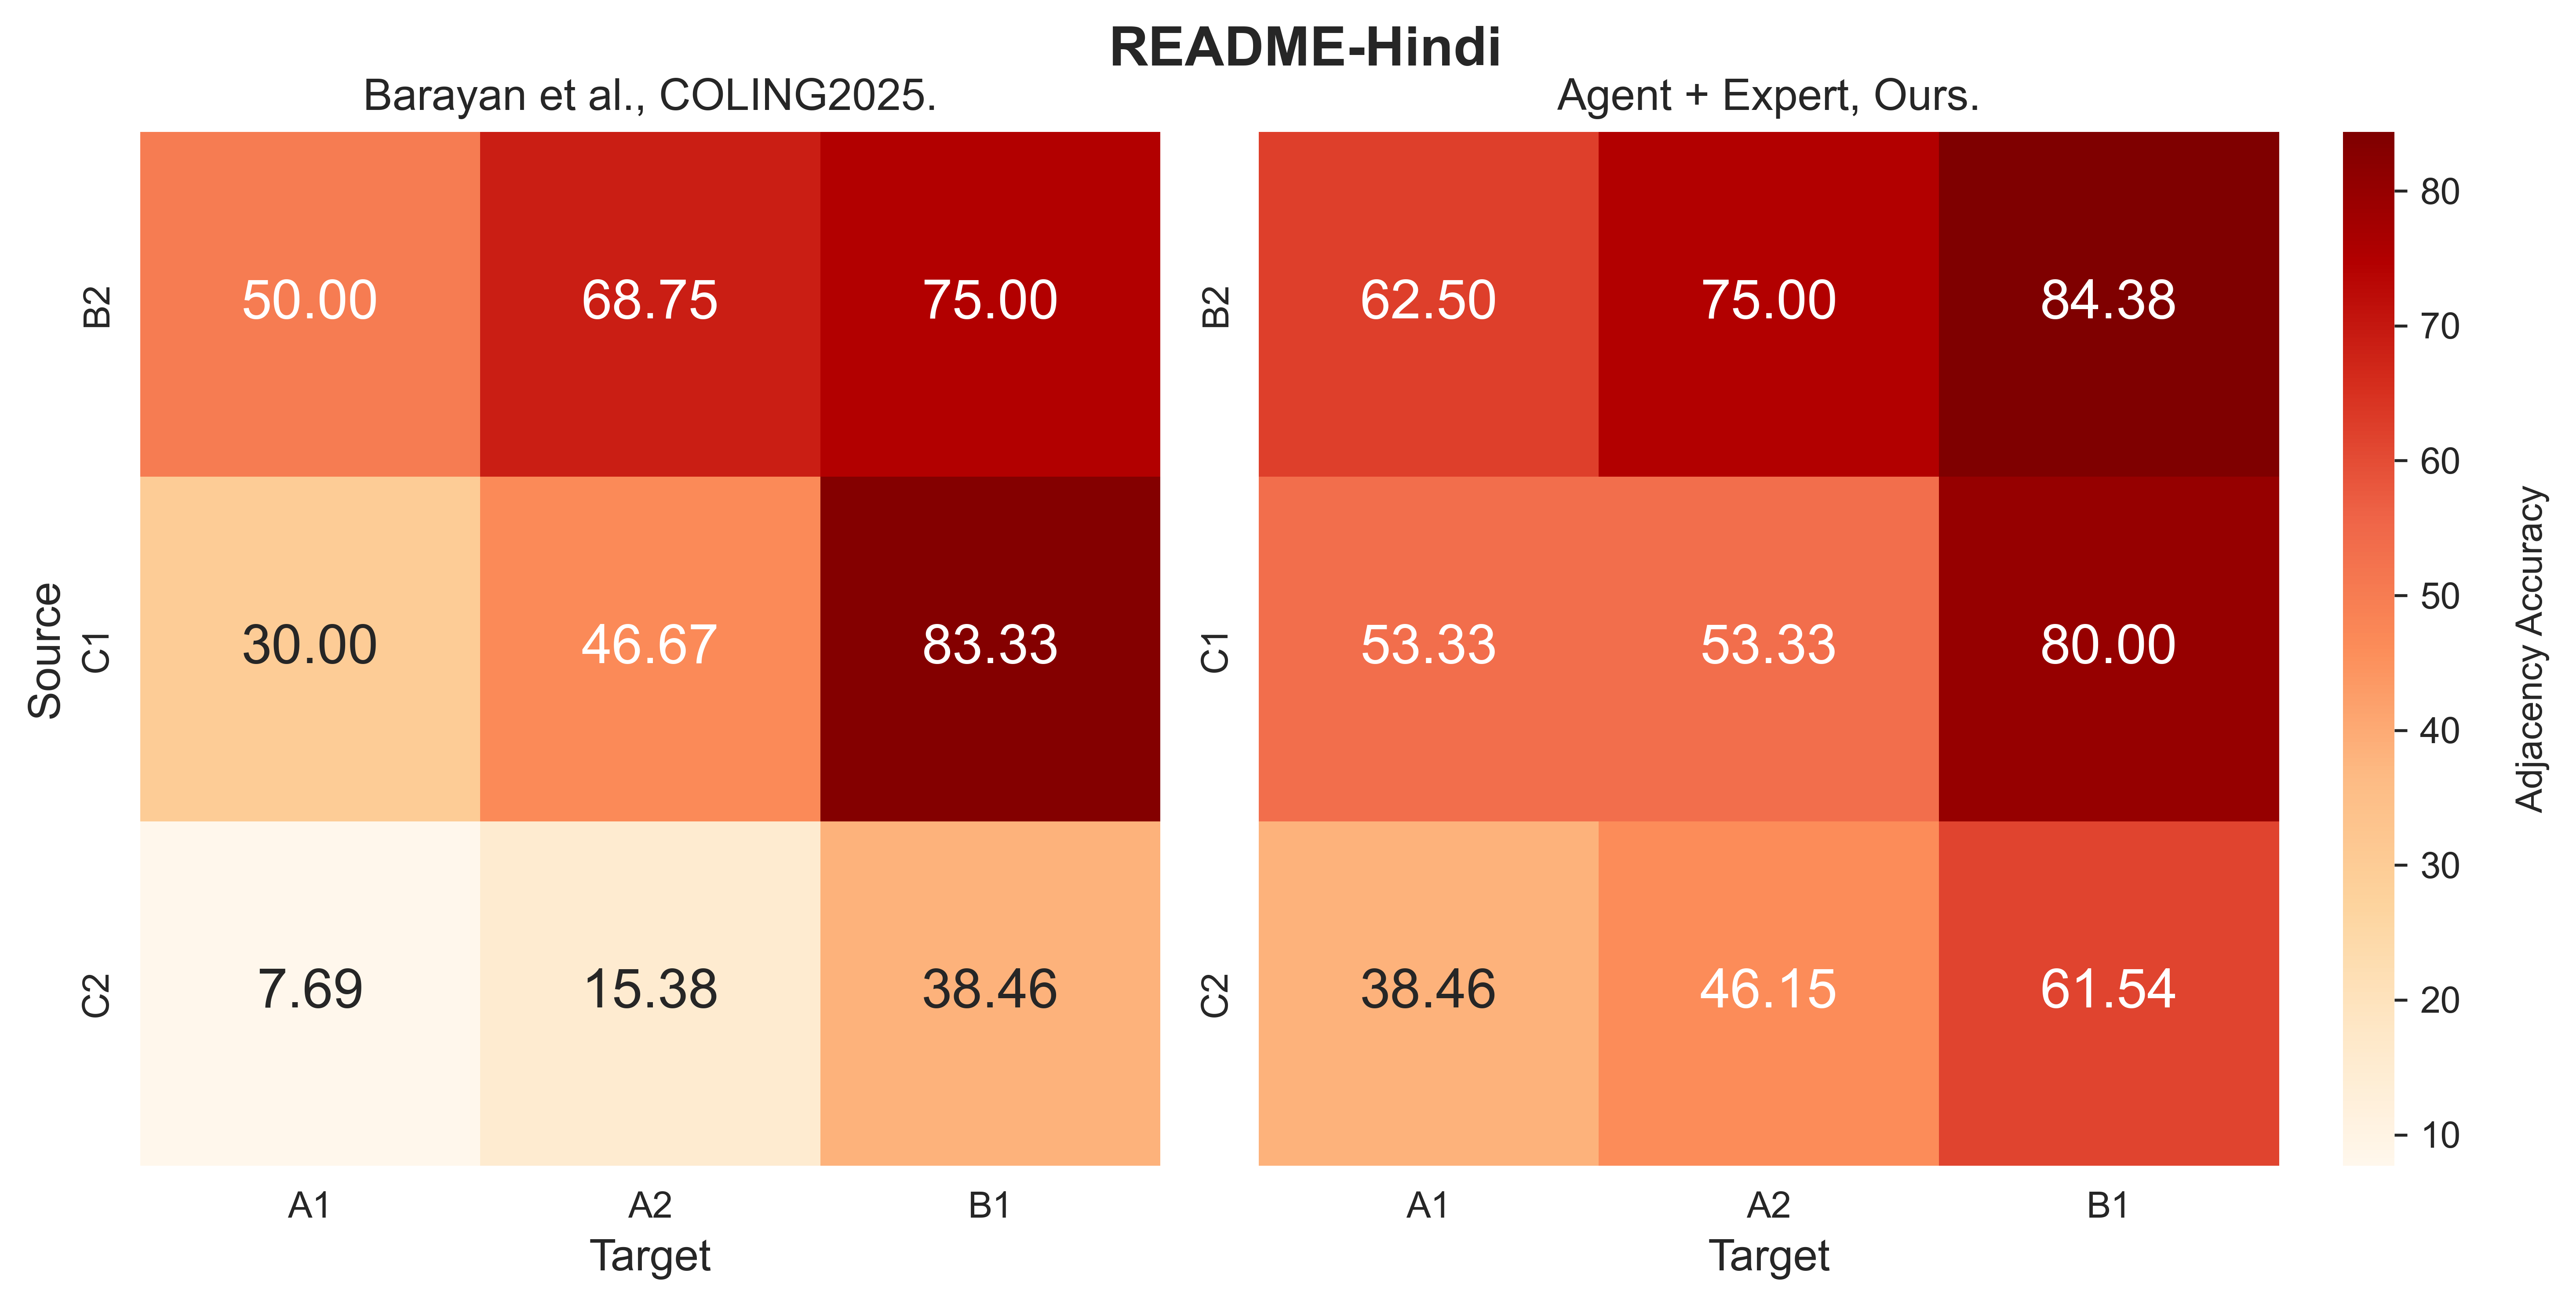

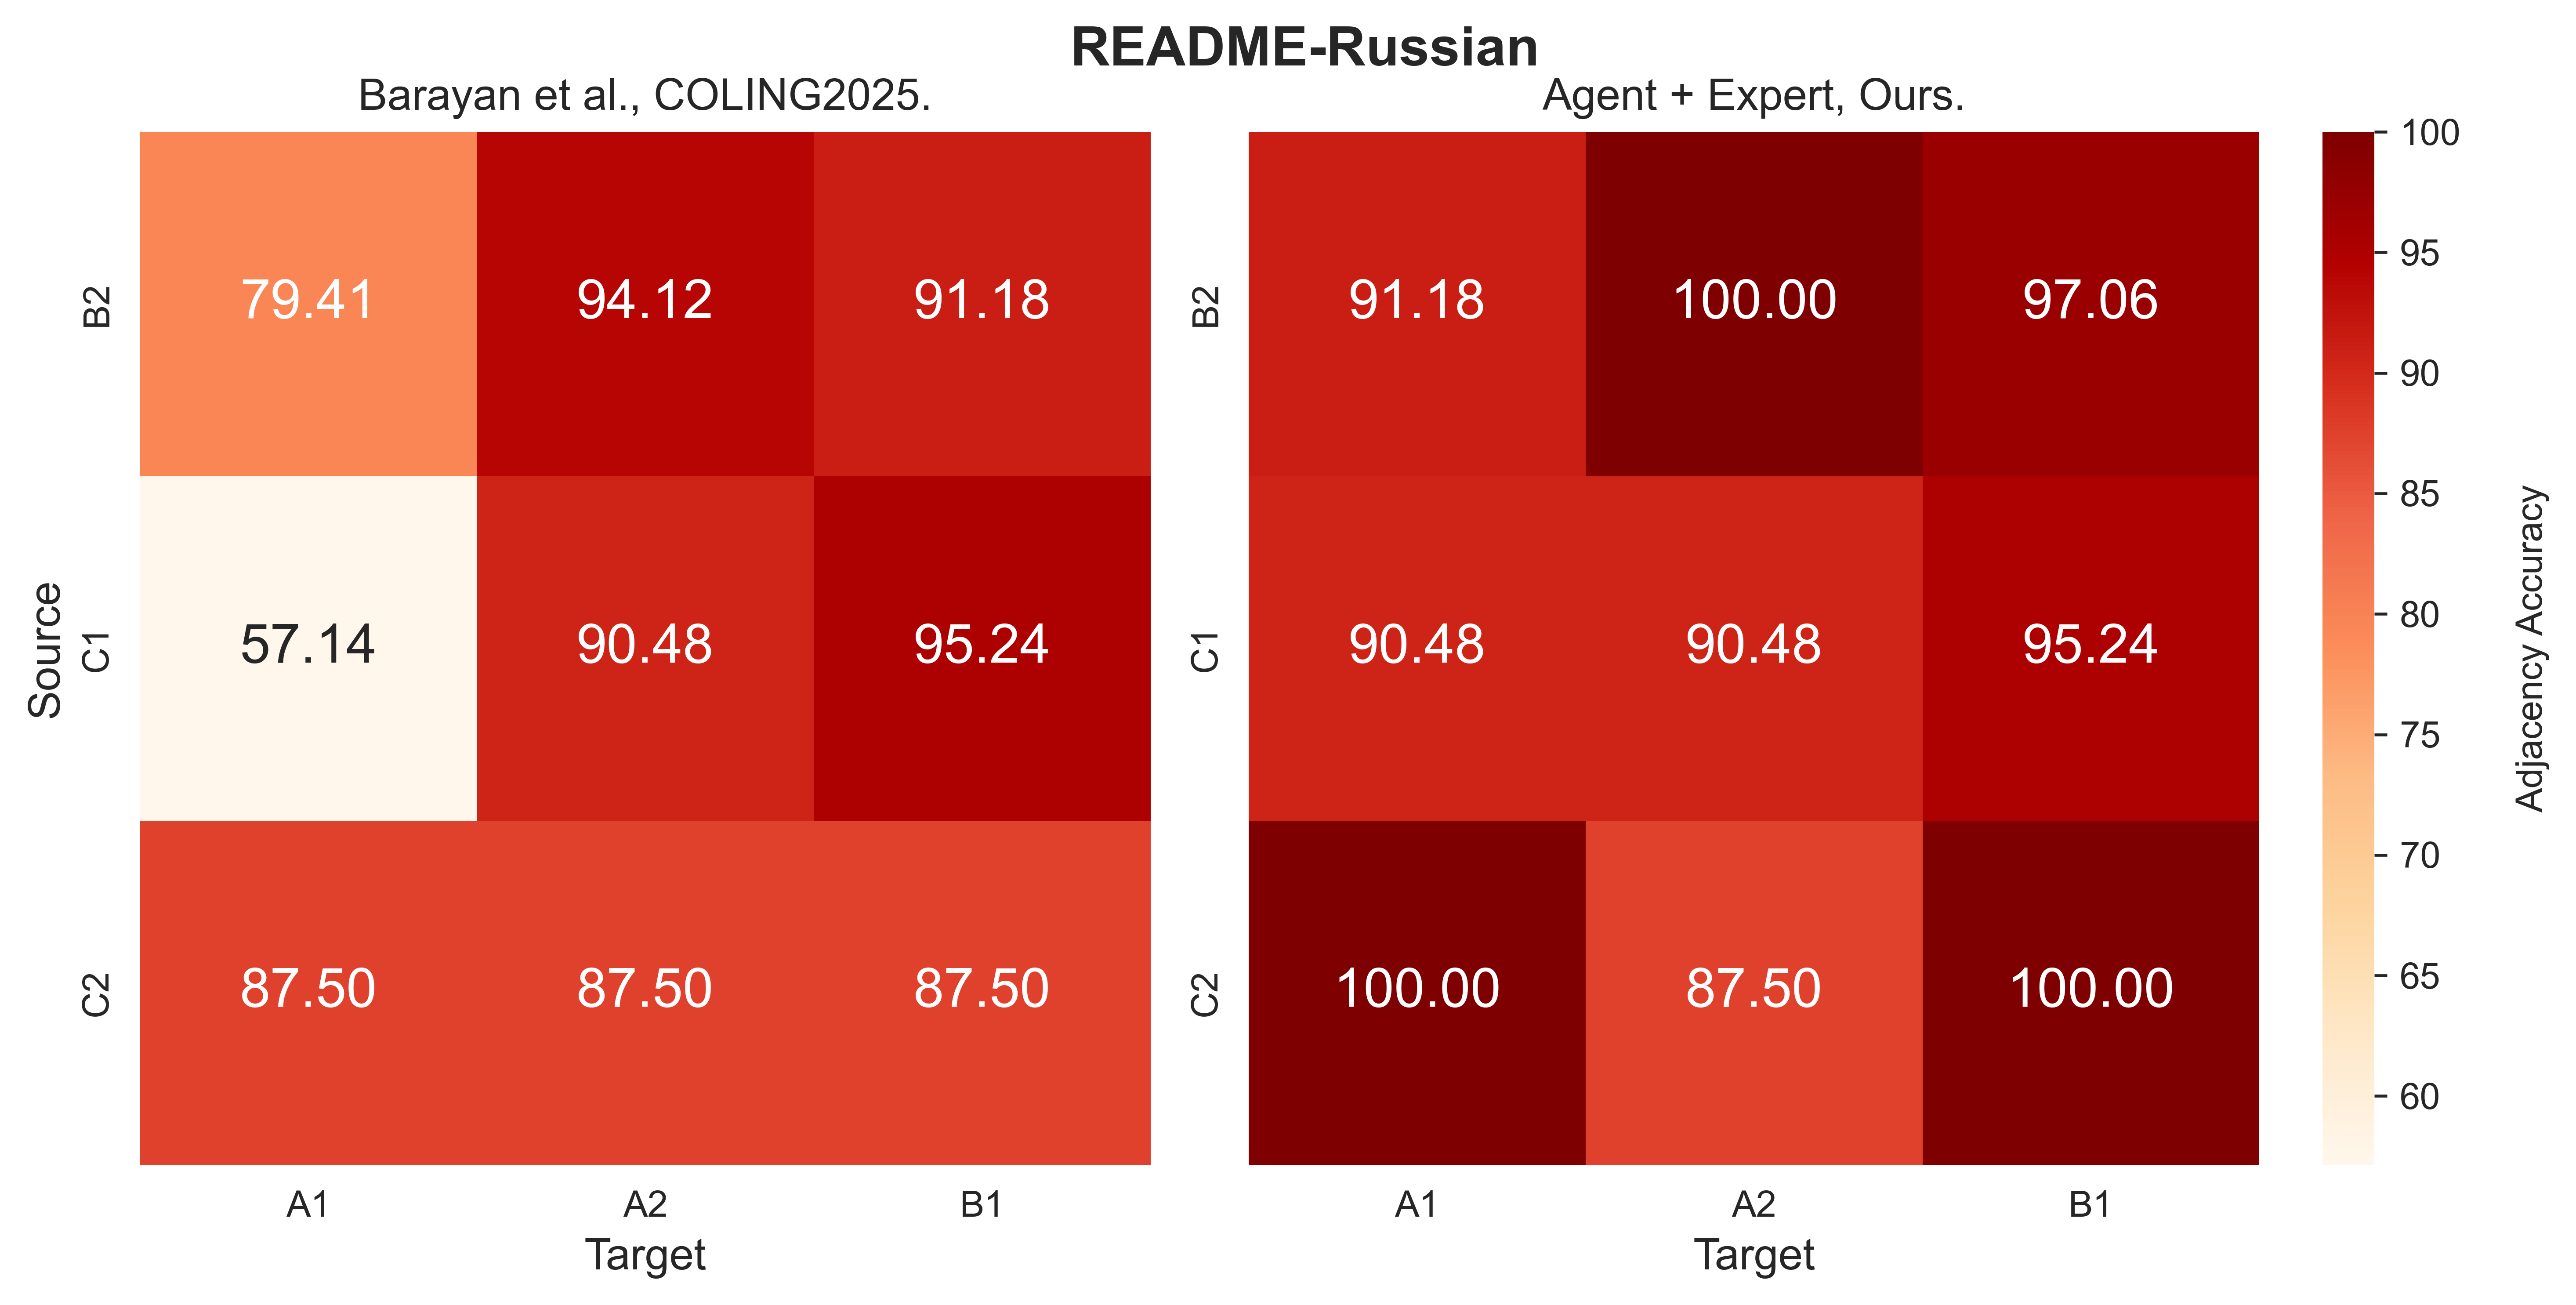

In [78]:
lang2desc = {
    "ar": "Arabic", "en": "English", "fr": "French", "hi": "Hindi", "ru": "Russian"
}
for lang in ["ar", "en", "fr", "hi", "ru"]:
    baseline = adjacc_matrix_dict[f"{lang}_baseline"]
    
    agent_expert = adjacc_matrix_dict[f"{lang}_17"]
    
    # 统一颜色范围
    vmin = min(baseline.min(), agent_expert.min())
    vmax = max(baseline.max(), agent_expert.max())
    
    # 创建一个包含两个子图的图形
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=600, gridspec_kw={'width_ratios': [1, 1.25]})
    
    x_labels = ['A1', 'A2', 'B1']
    y_labels = ['B2', 'C1', 'C2']
    
    # 在第一个子图中绘制第一个数组的热力图
    cmap = "OrRd"
    sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
    axes[0].set_xlabel('Target', fontsize = 12)
    axes[0].set_ylabel('Source', fontsize = 12)
    
    # 在第二个子图中绘制第二个数组的热力图
    heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
    axes[1].set_xlabel('Target', fontsize = 12)
    # axes[1].set_ylabel('Source', fontsize = 12)
    
    # 获取颜色条对象
    cbar = heatmap.collections[0].colorbar
    # 为颜色条添加标签
    cbar.set_label('Adjacency Accuracy', rotation=90, labelpad=15)
    
    # 给整个图片添加标题
    fig.suptitle(f'README-{lang2desc[lang]}', fontsize=15, fontweight='bold')
    
    # 显示图形
    plt.tight_layout()
    # 调整子图布局，为标题留出空间
    plt.subplots_adjust(top=0.9)
    plt.savefig(os.path.join(SAVEDIR, f"img/README/{lang}/README-{lang}_agent-expert_adjacc_{cmap}.jpg"), dpi = 1000, bbox_inches='tight')
    plt.show()
    plt.close()

### Visual README Exact Heatmap between COLING2025 with ours agent+expert

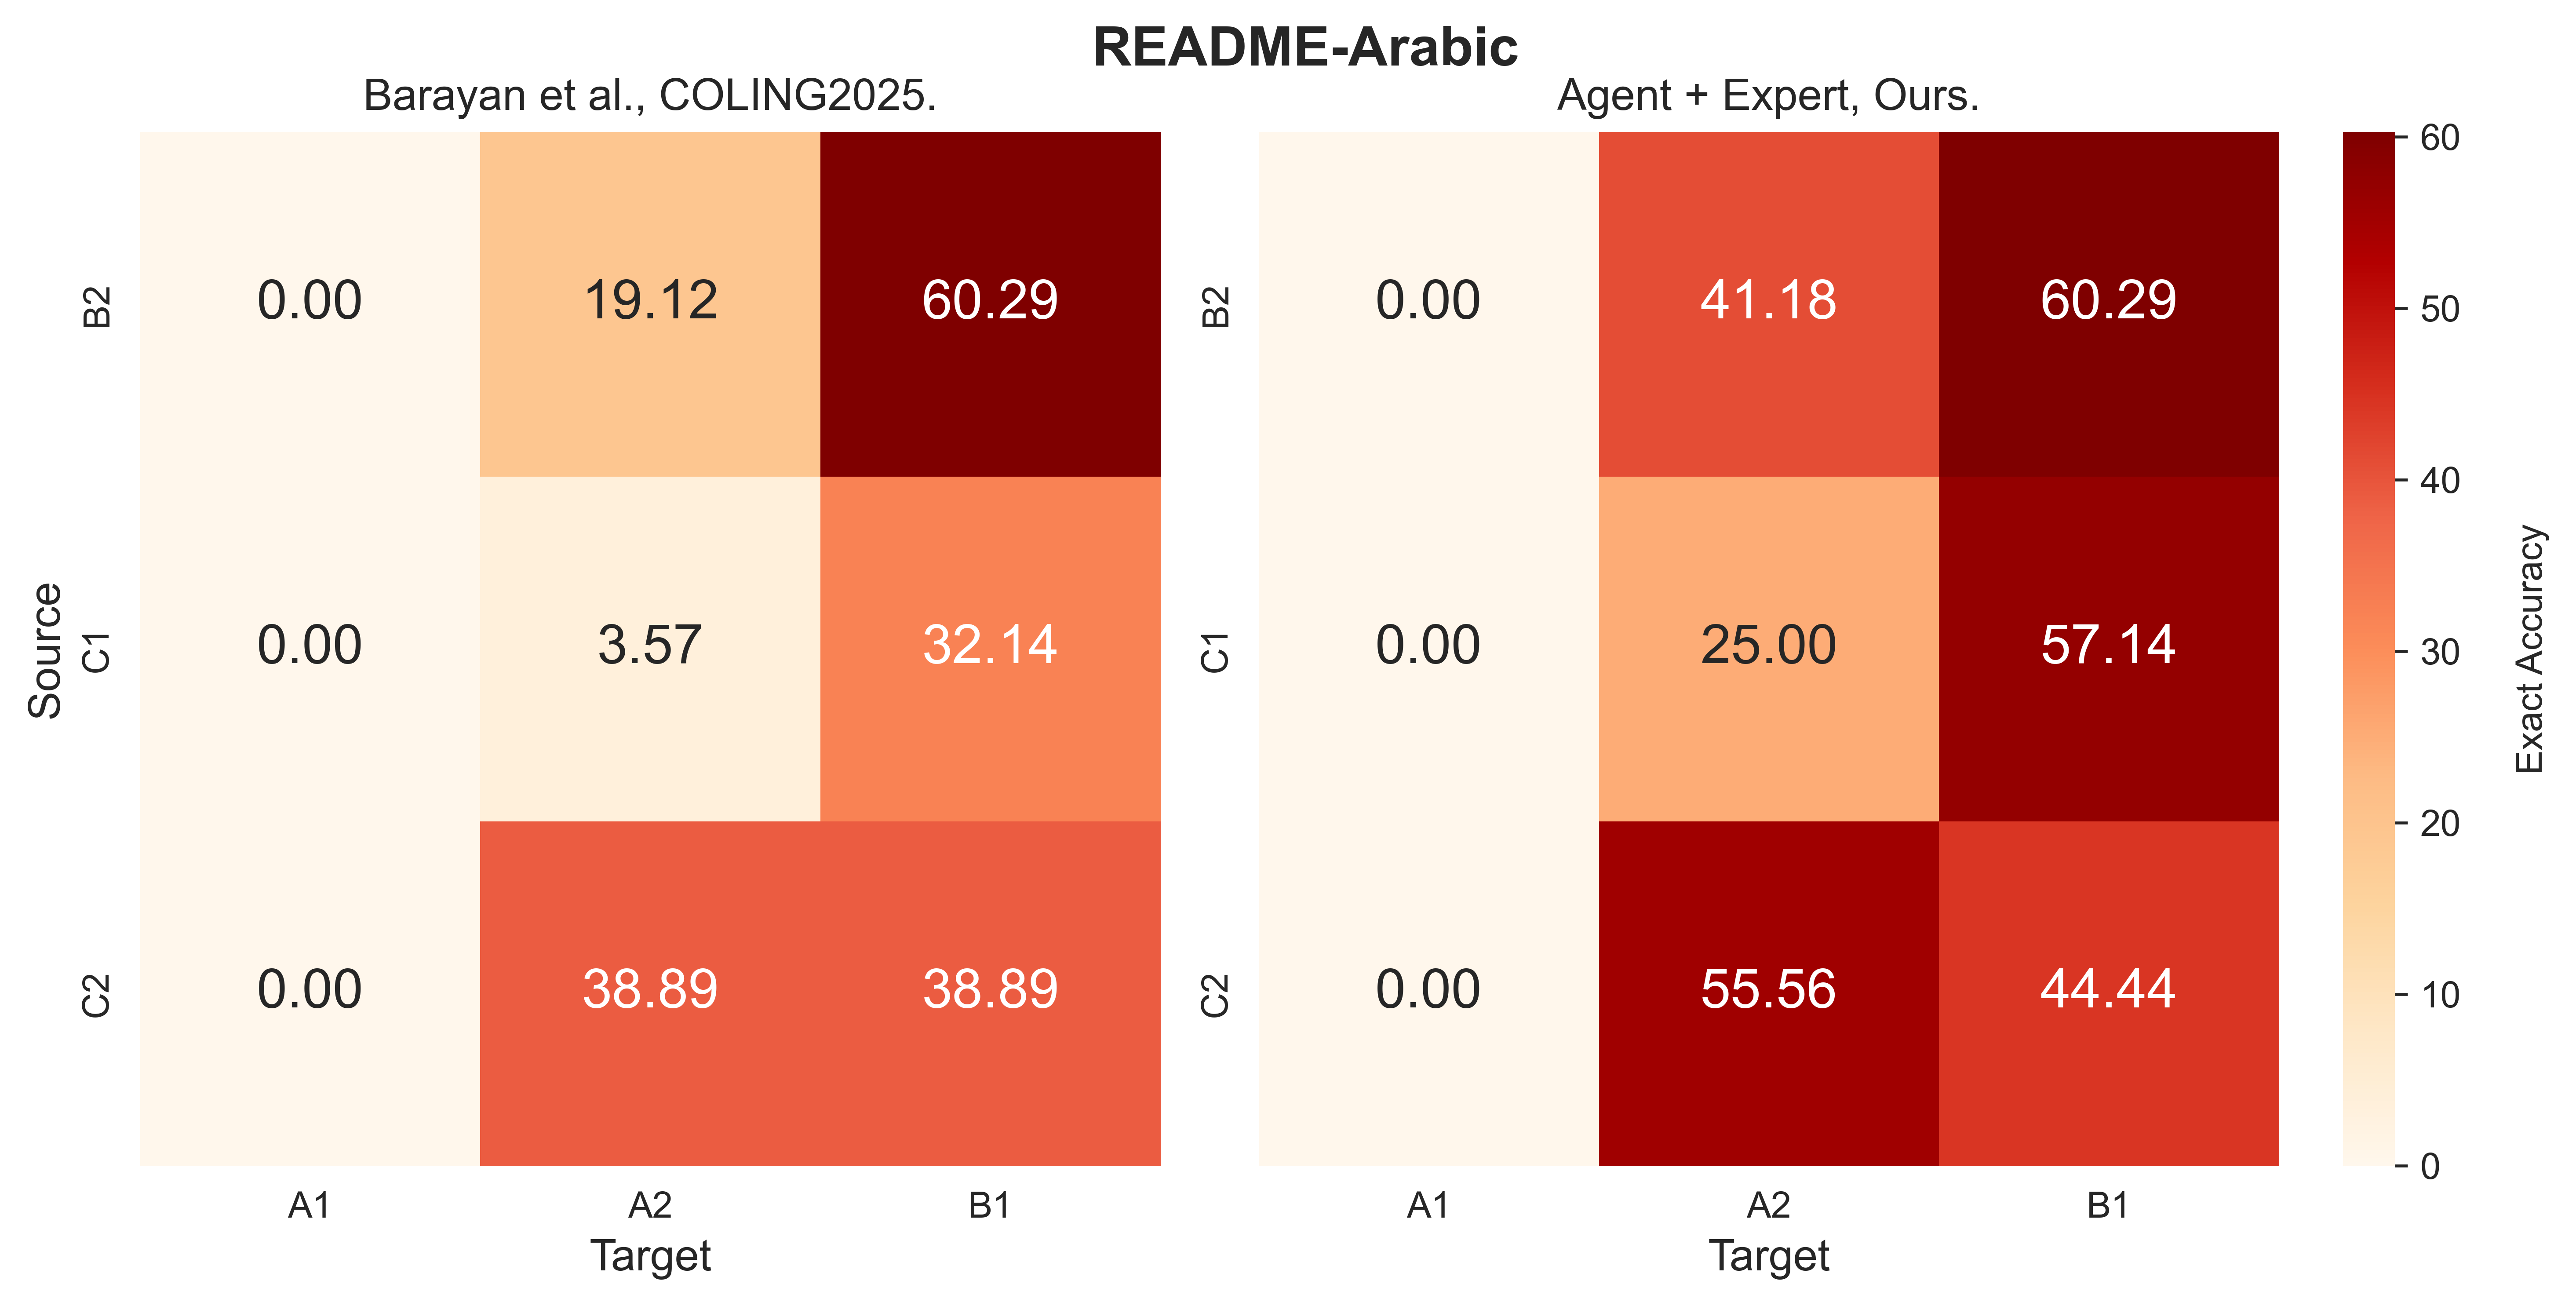

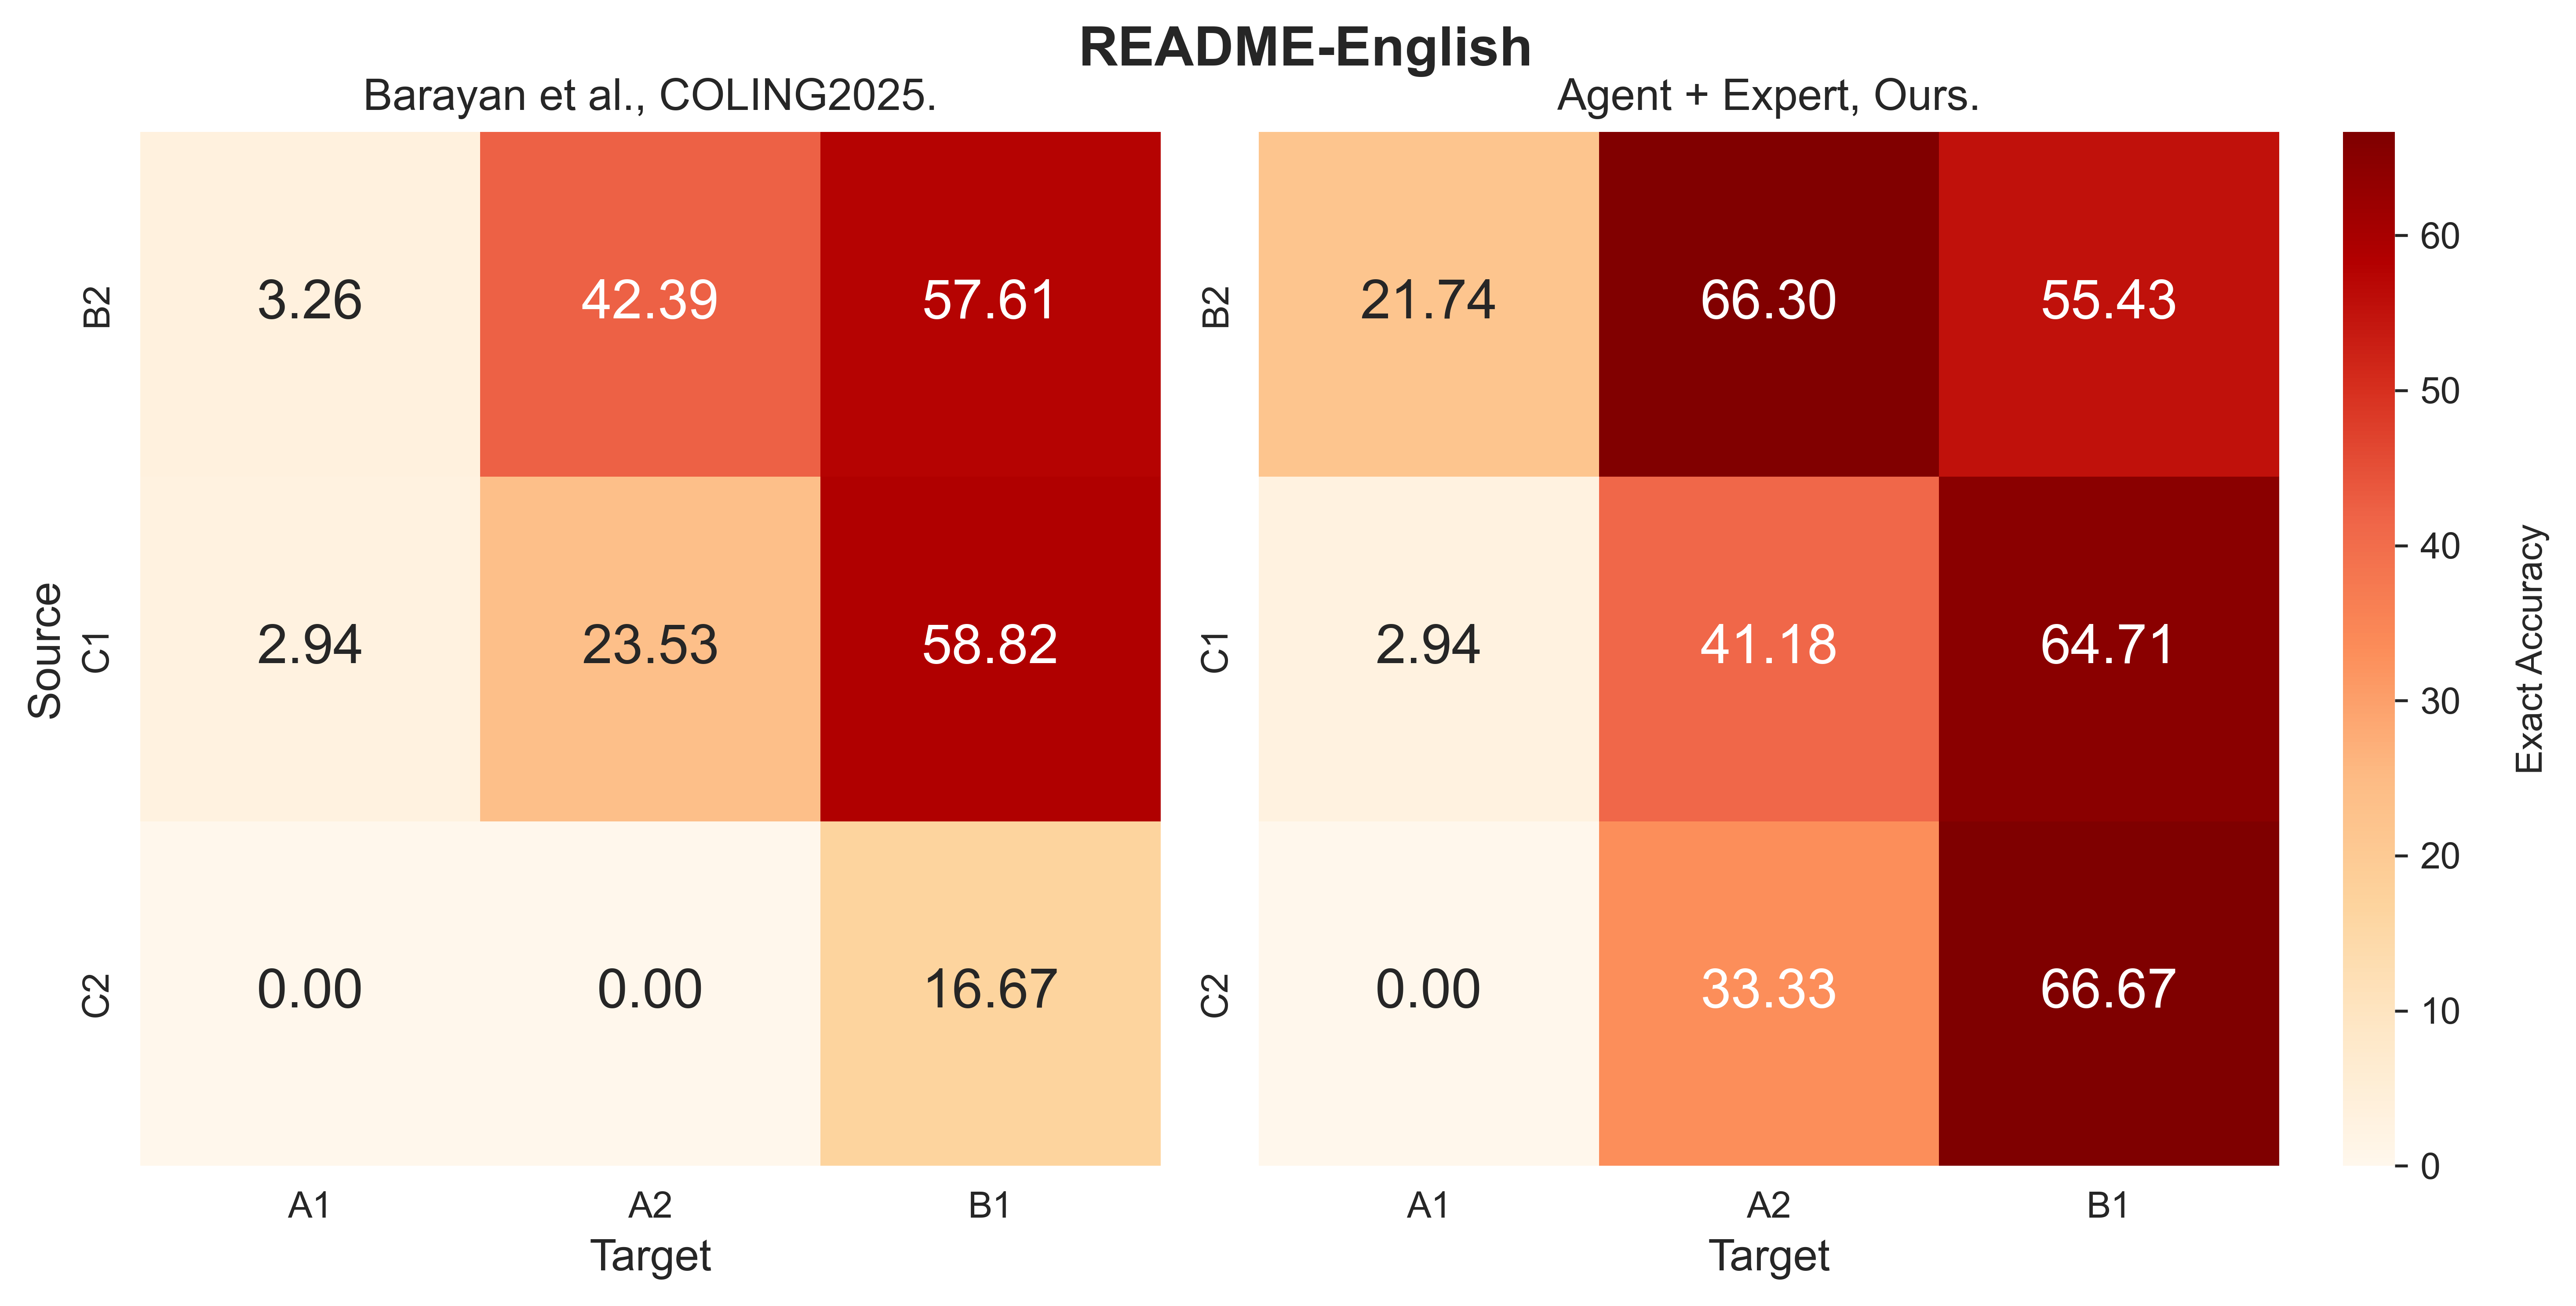

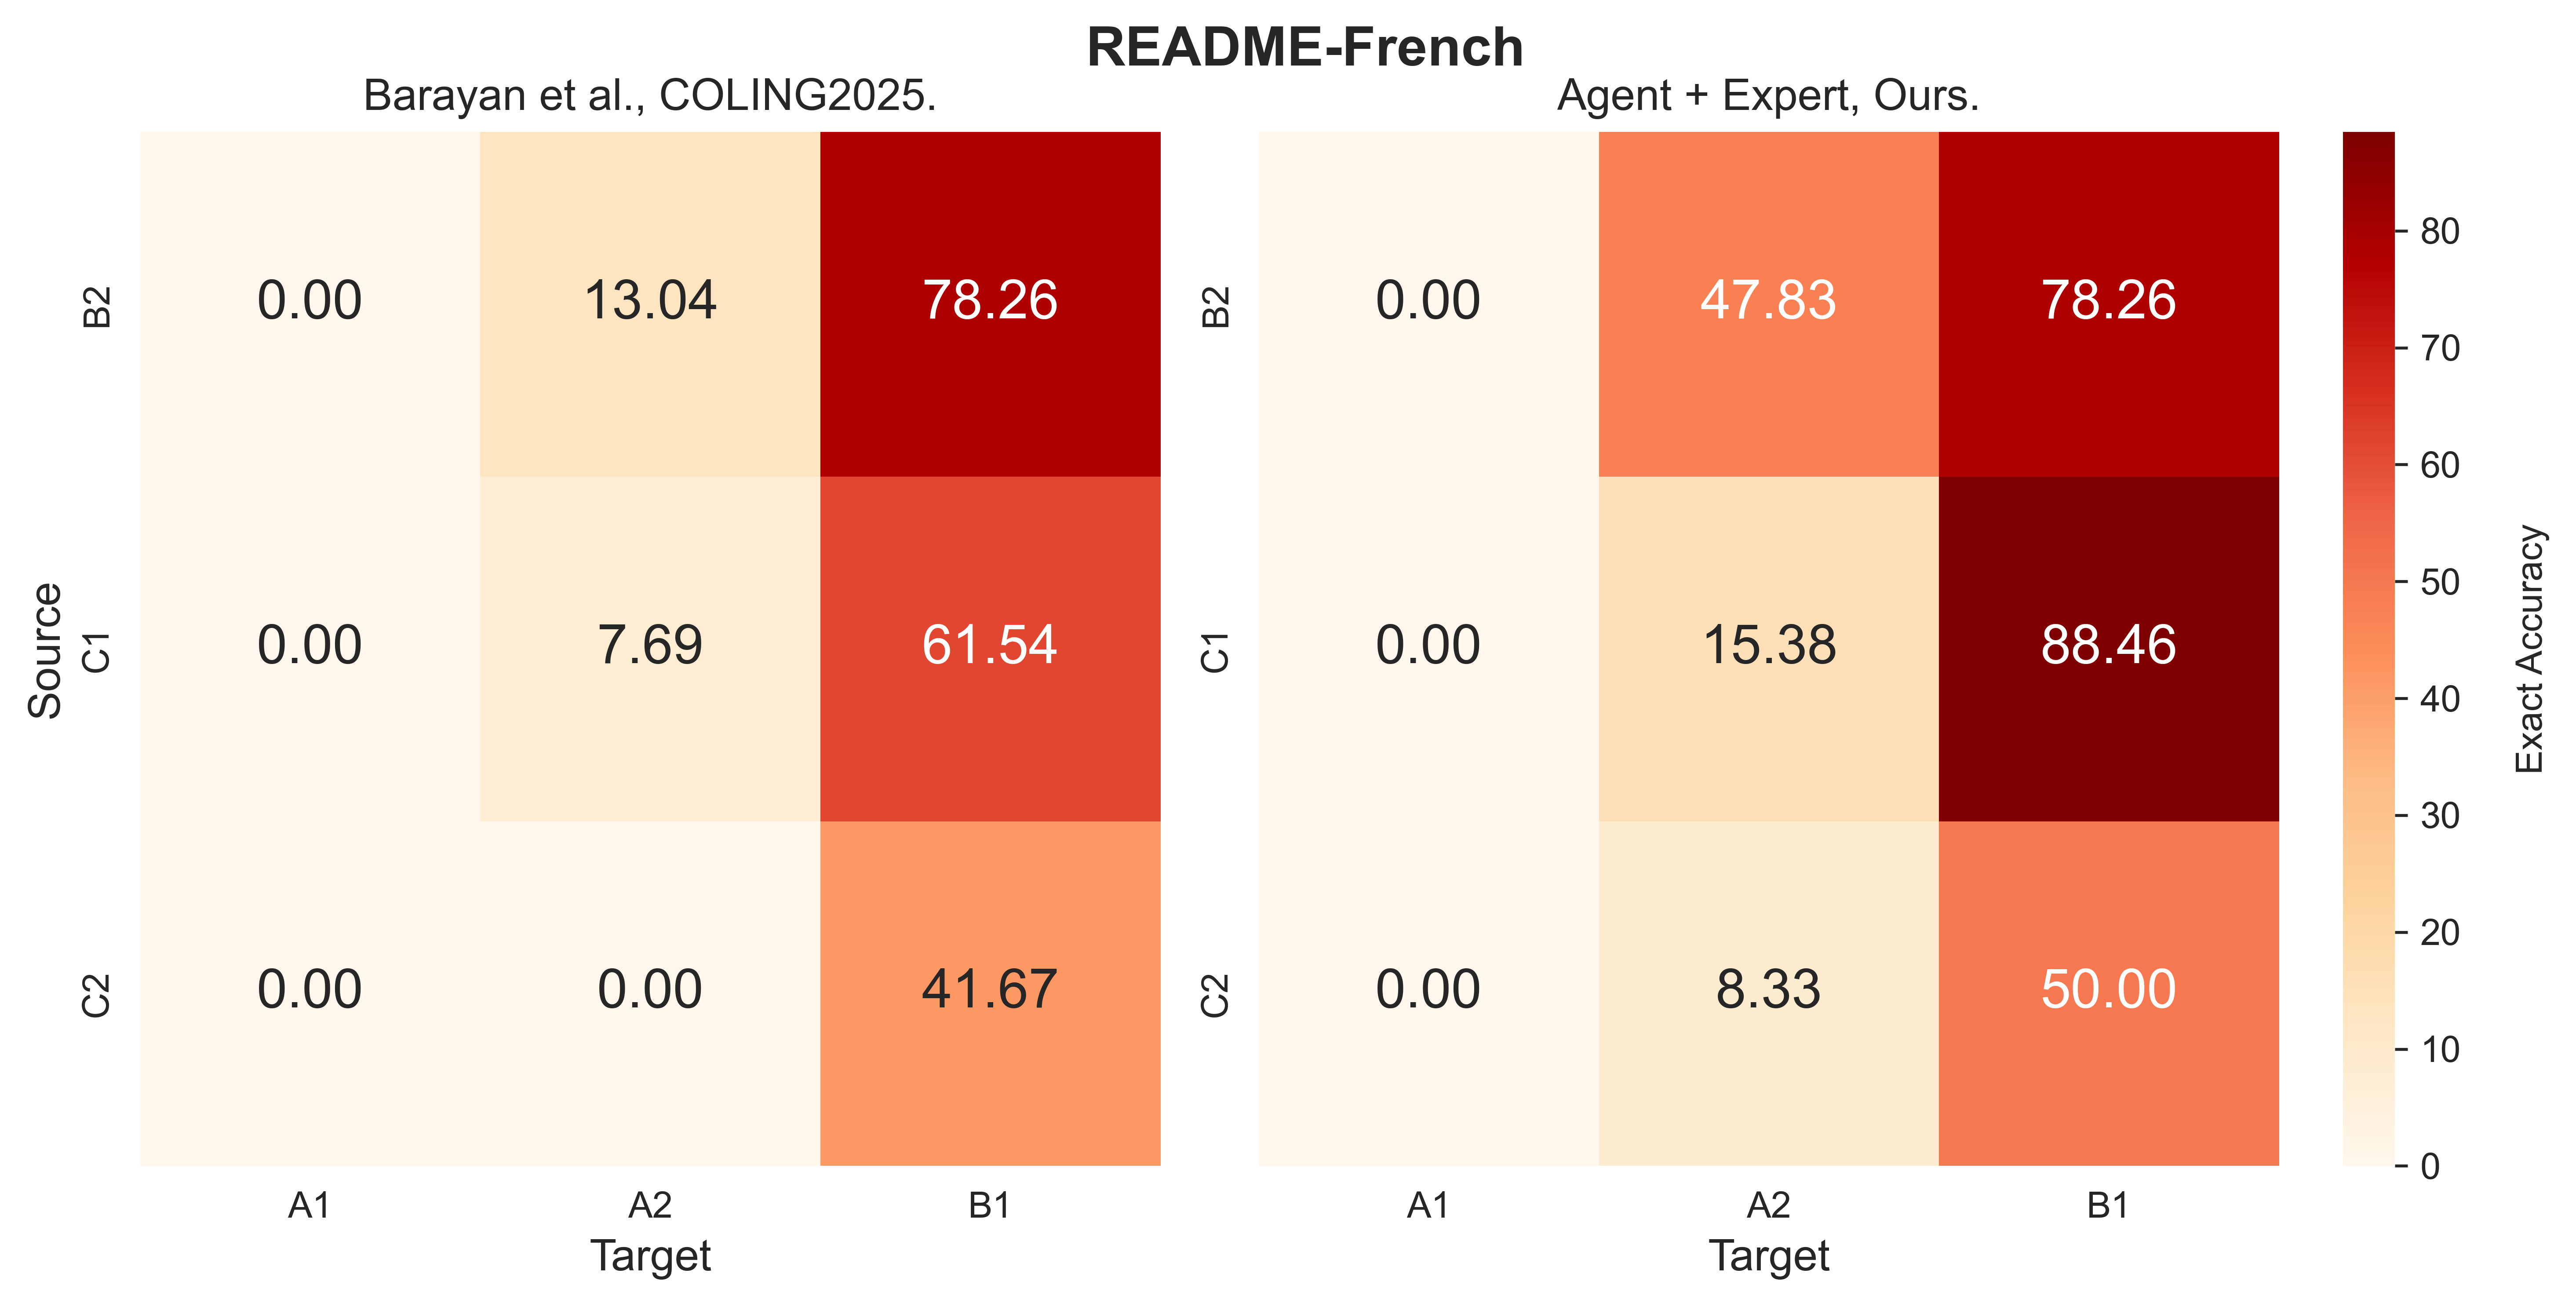

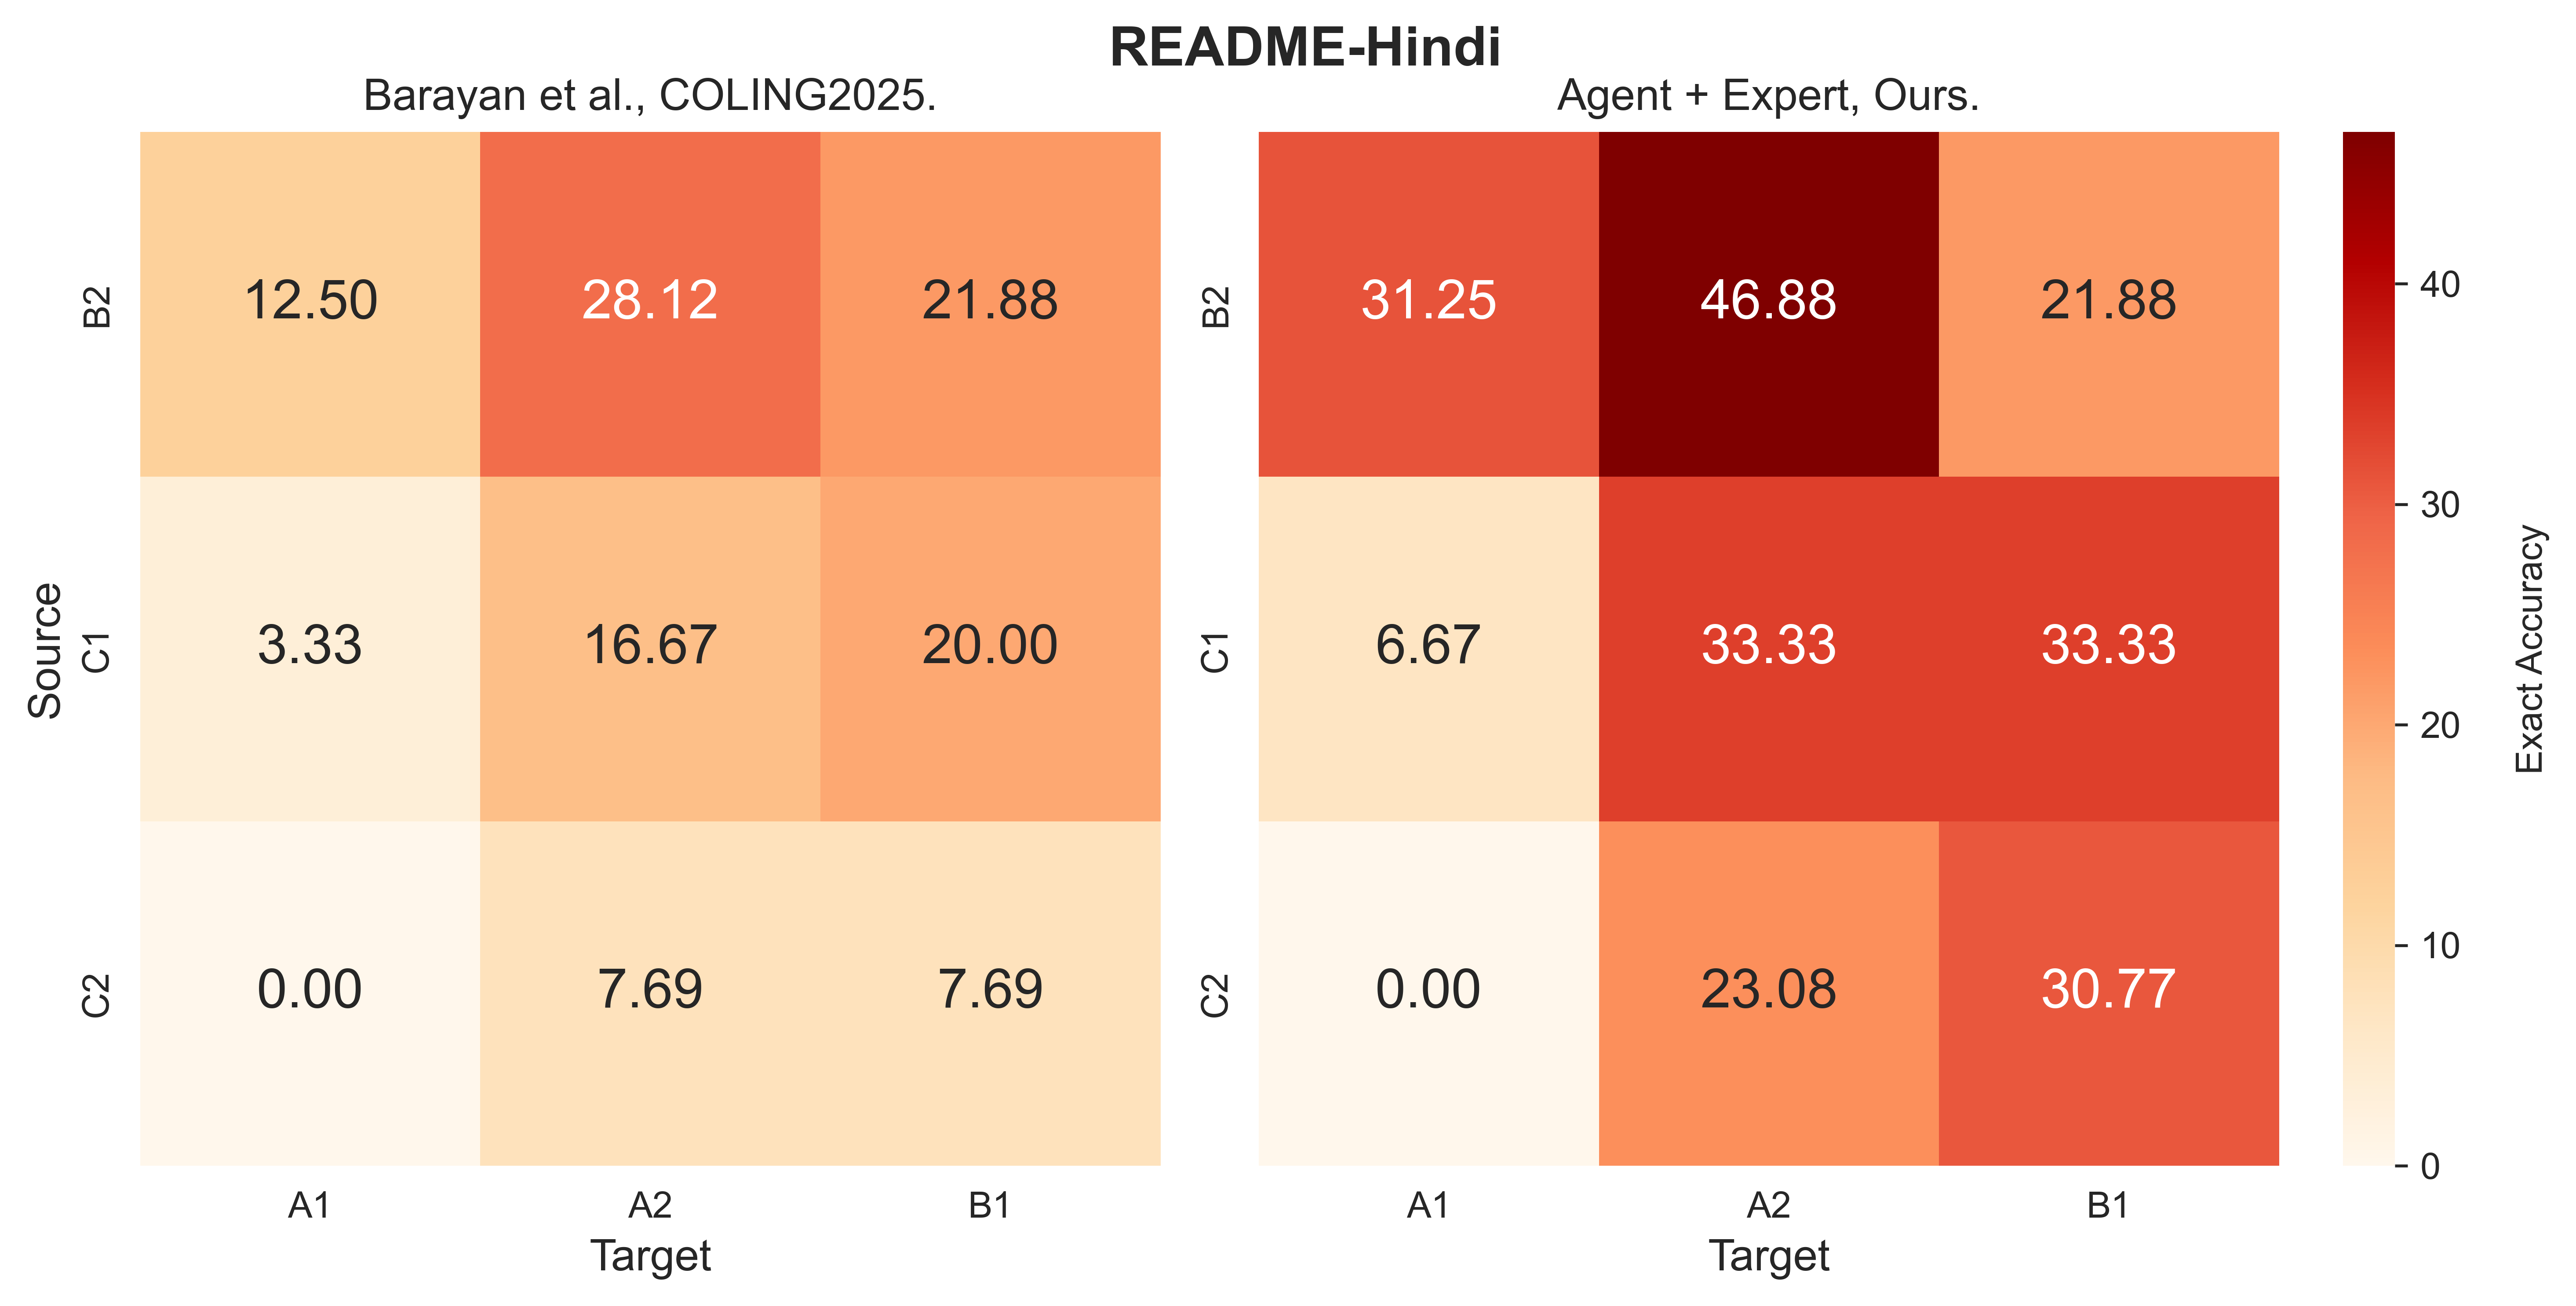

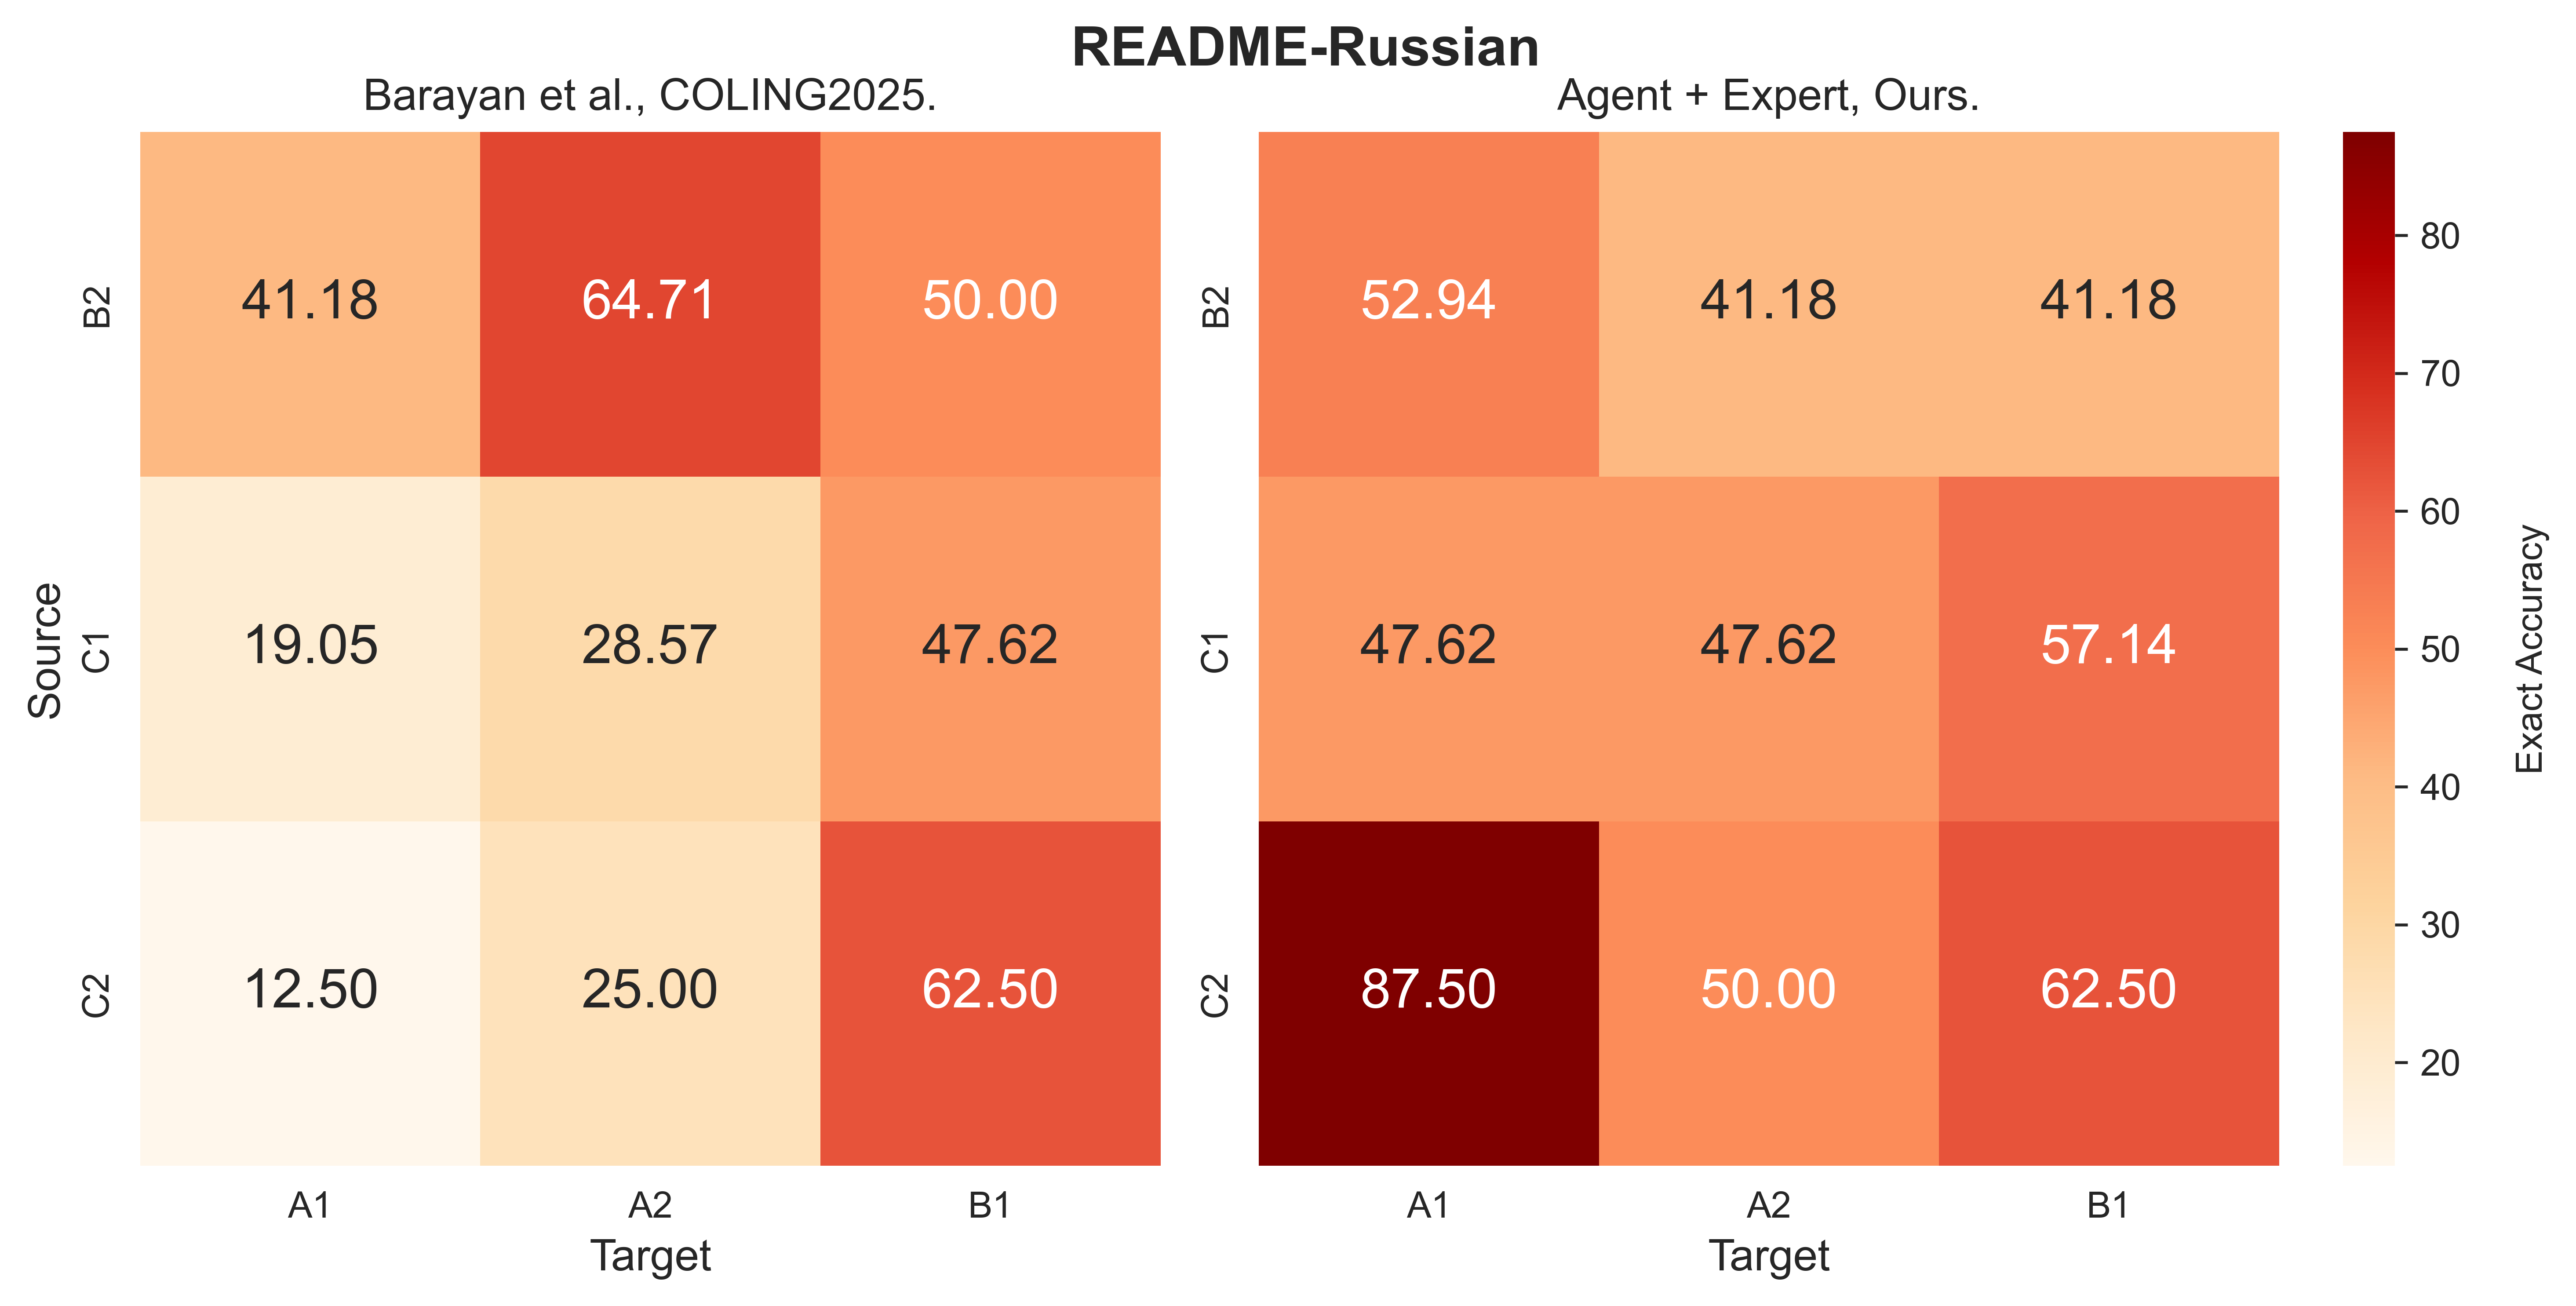

In [79]:
lang2desc = {
    "ar": "Arabic", "en": "English", "fr": "French", "hi": "Hindi", "ru": "Russian"
}
for lang in ["ar", "en", "fr", "hi", "ru"]:
    baseline = exacc_matrix_dict[f"{lang}_baseline"]
    
    agent_expert = exacc_matrix_dict[f"{lang}_17"]
    
    # 统一颜色范围
    vmin = min(baseline.min(), agent_expert.min())
    vmax = max(baseline.max(), agent_expert.max())
    
    # 创建一个包含两个子图的图形
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=600, gridspec_kw={'width_ratios': [1, 1.25]})
    
    x_labels = ['A1', 'A2', 'B1']
    y_labels = ['B2', 'C1', 'C2']
    
    # 在第一个子图中绘制第一个数组的热力图
    cmap = "OrRd"
    sns.heatmap(baseline, annot=True, ax=axes[0], cbar=False, cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[0].set_title('Barayan et al., COLING2025.', fontsize = 12)
    axes[0].set_xlabel('Target', fontsize = 12)
    axes[0].set_ylabel('Source', fontsize = 12)
    
    # 在第二个子图中绘制第二个数组的热力图
    heatmap = sns.heatmap(agent_expert, annot=True, ax=axes[1], cmap = cmap, xticklabels=x_labels, yticklabels=y_labels, vmin=vmin, vmax=vmax, annot_kws={'size': 15}, fmt='.2f')
    axes[1].set_title('Agent + Expert, Ours.', fontsize = 12)
    axes[1].set_xlabel('Target', fontsize = 12)
    # axes[1].set_ylabel('Source', fontsize = 12)
    
    # 获取颜色条对象
    cbar = heatmap.collections[0].colorbar
    # 为颜色条添加标签
    cbar.set_label('Exact Accuracy', rotation=90, labelpad=15)
    
    # 给整个图片添加标题
    fig.suptitle(f'README-{lang2desc[lang]}', fontsize=15, fontweight='bold')
    
    # 显示图形
    plt.tight_layout()
    # 调整子图布局，为标题留出空间
    plt.subplots_adjust(top=0.9)
    plt.savefig(os.path.join(SAVEDIR, f"img/README/{lang}/README-{lang}_agent-expert_exaacc_{cmap}.jpg"), dpi = 1000, bbox_inches='tight')
    plt.show()
    plt.close()